In [1]:
!ls

PaddleSeg
arquivos
compartilhado
lamina_teste
results_6757_1_110_jpg.rf.346e446b3fbe17c5e36e0898502ee196.jpg
runs
visao_computacional-3
visao_computacional.ipynb
yolo11n.pt
yolo11s.pt


In [2]:
%cd runs/detect/train

/lapix/runs/detect/train


/root/anaconda3/envs/lapixdl/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


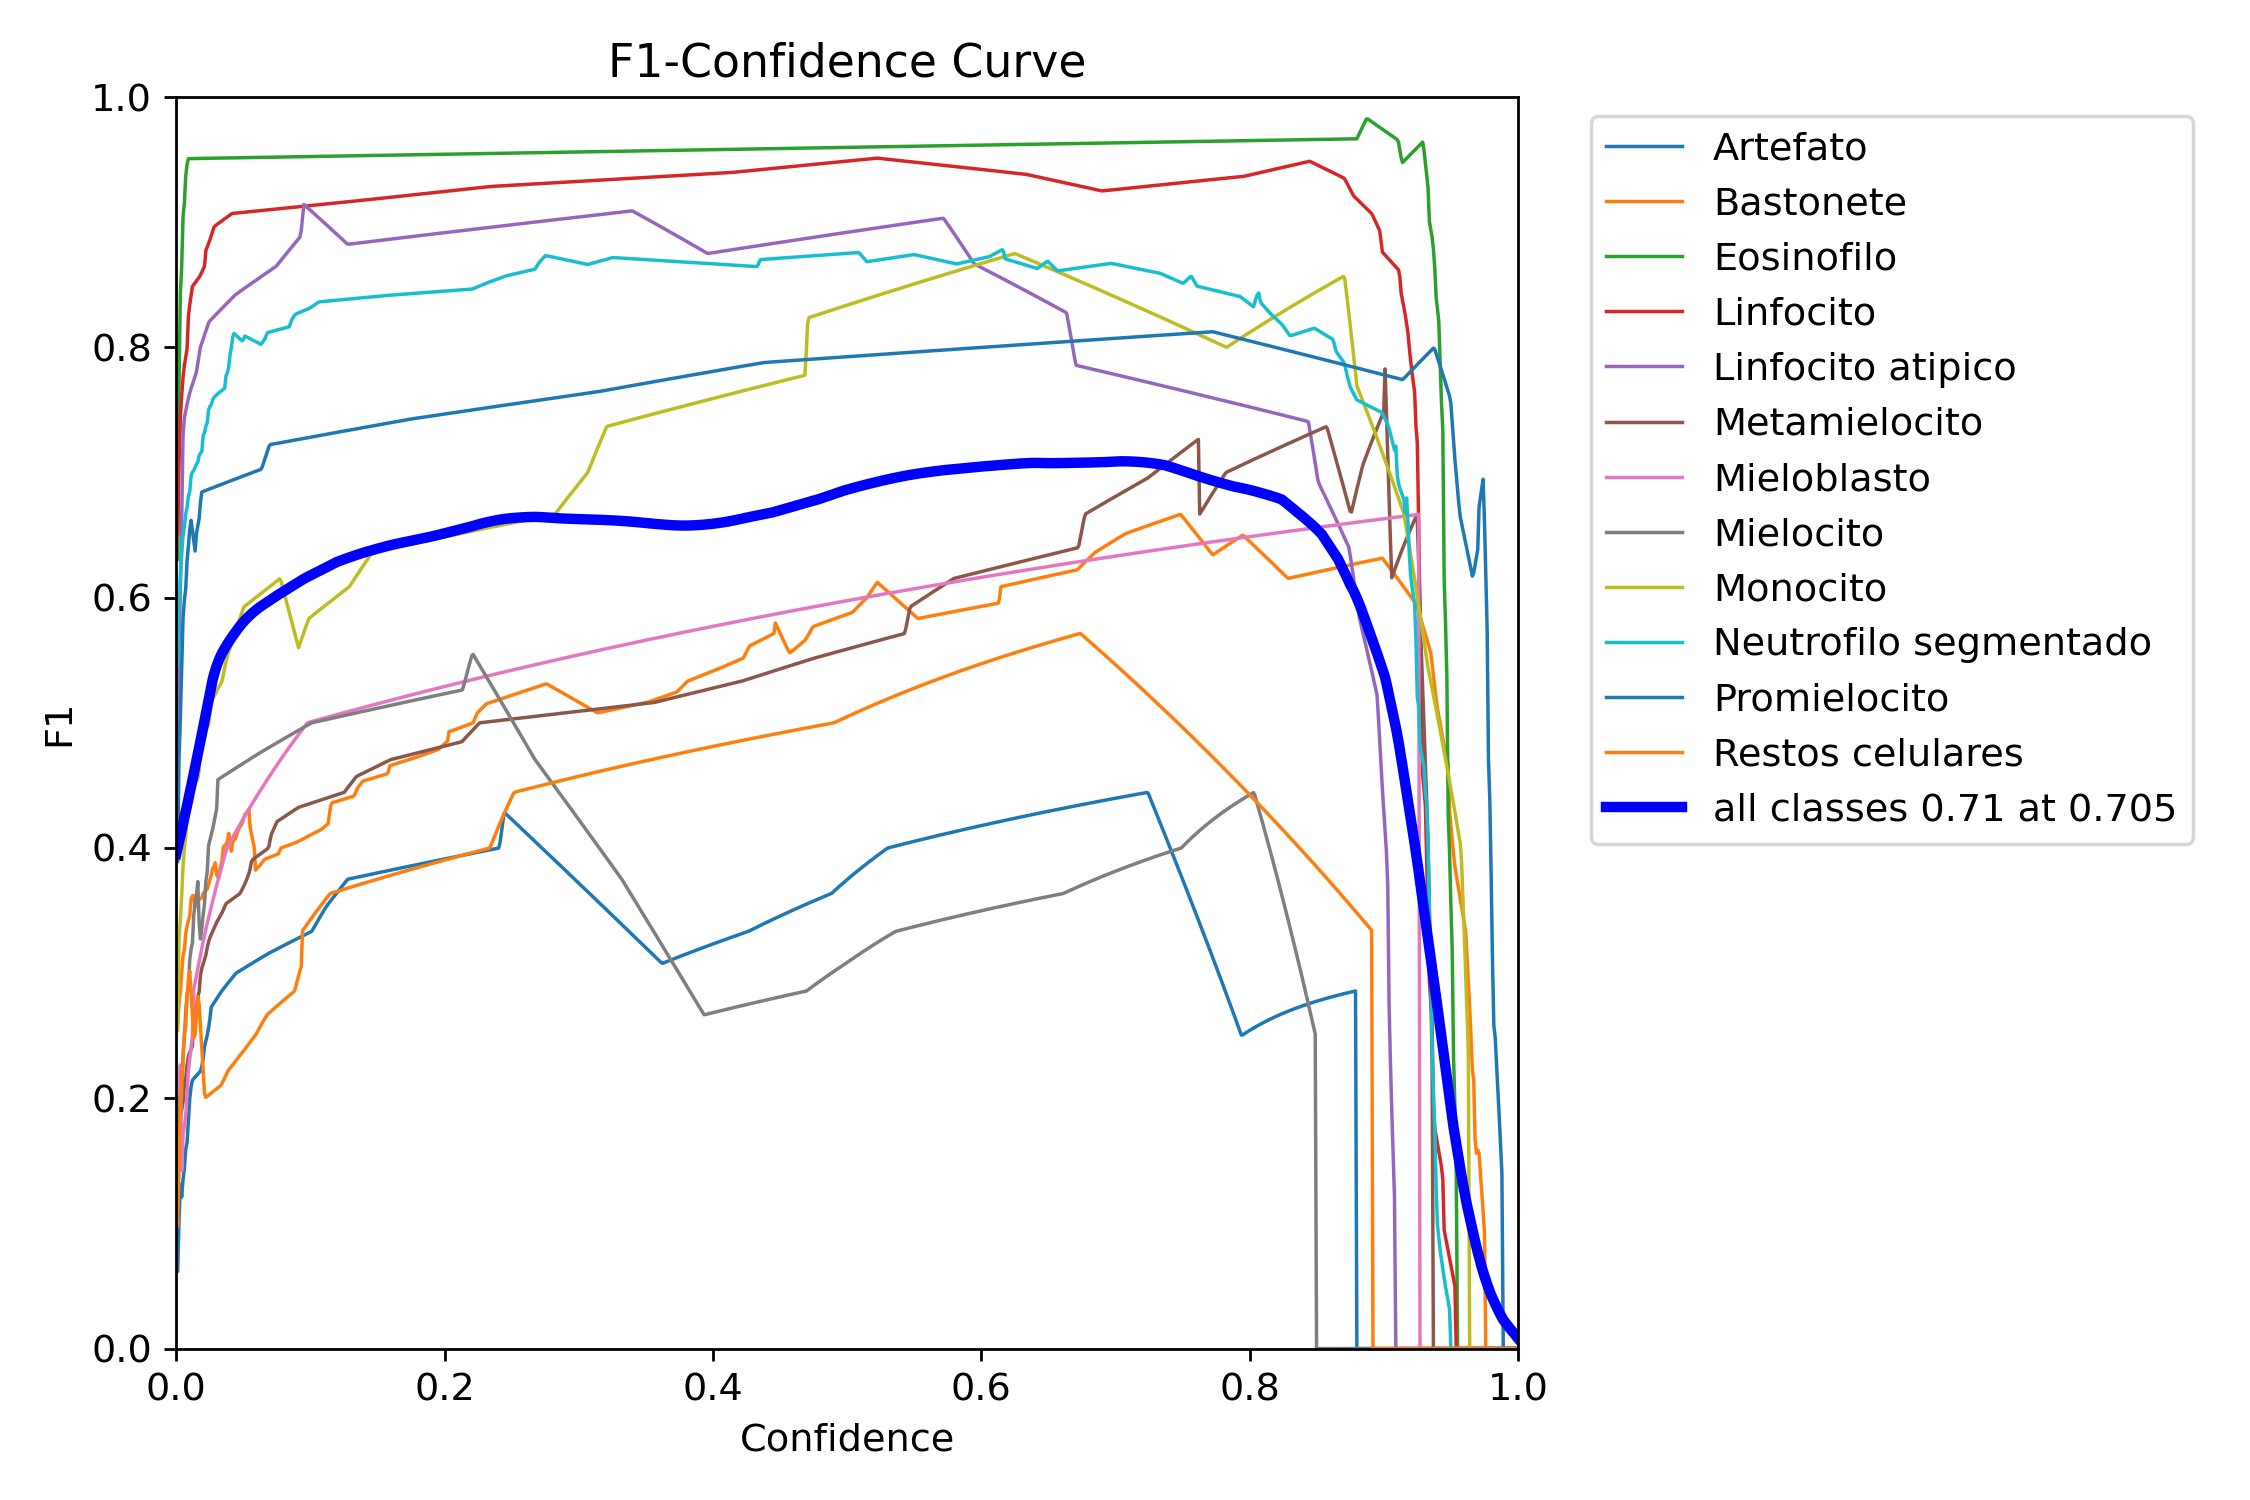

Displaying F1_curve.png


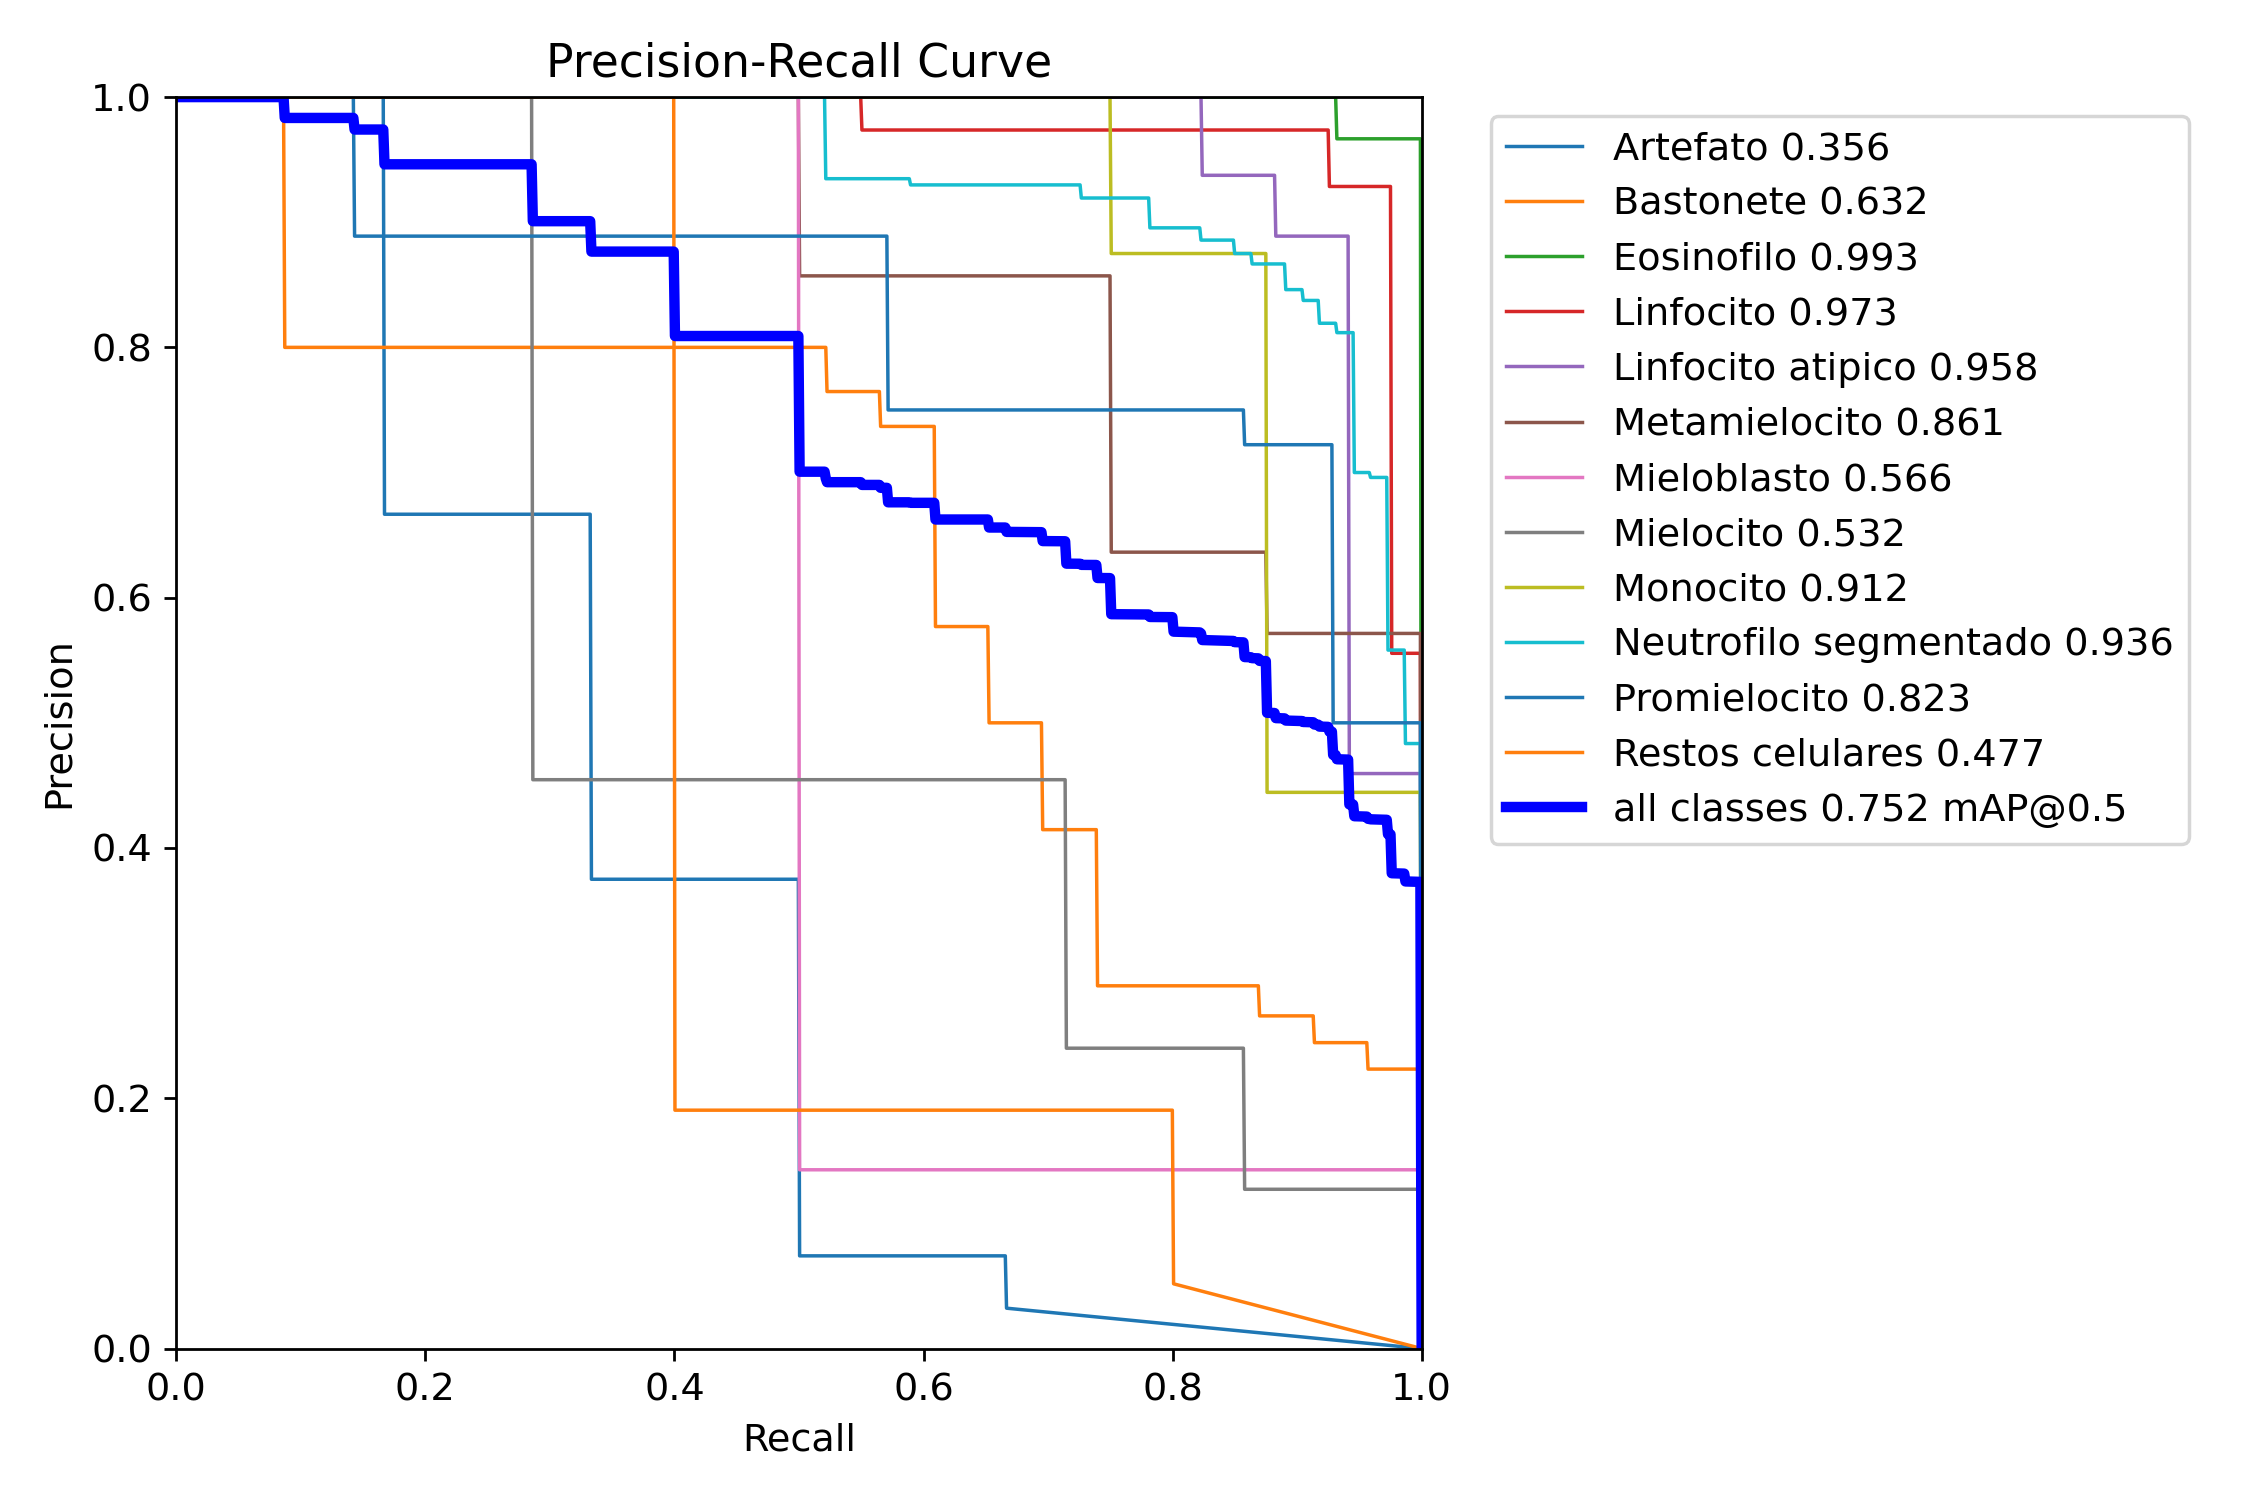

Displaying PR_curve.png


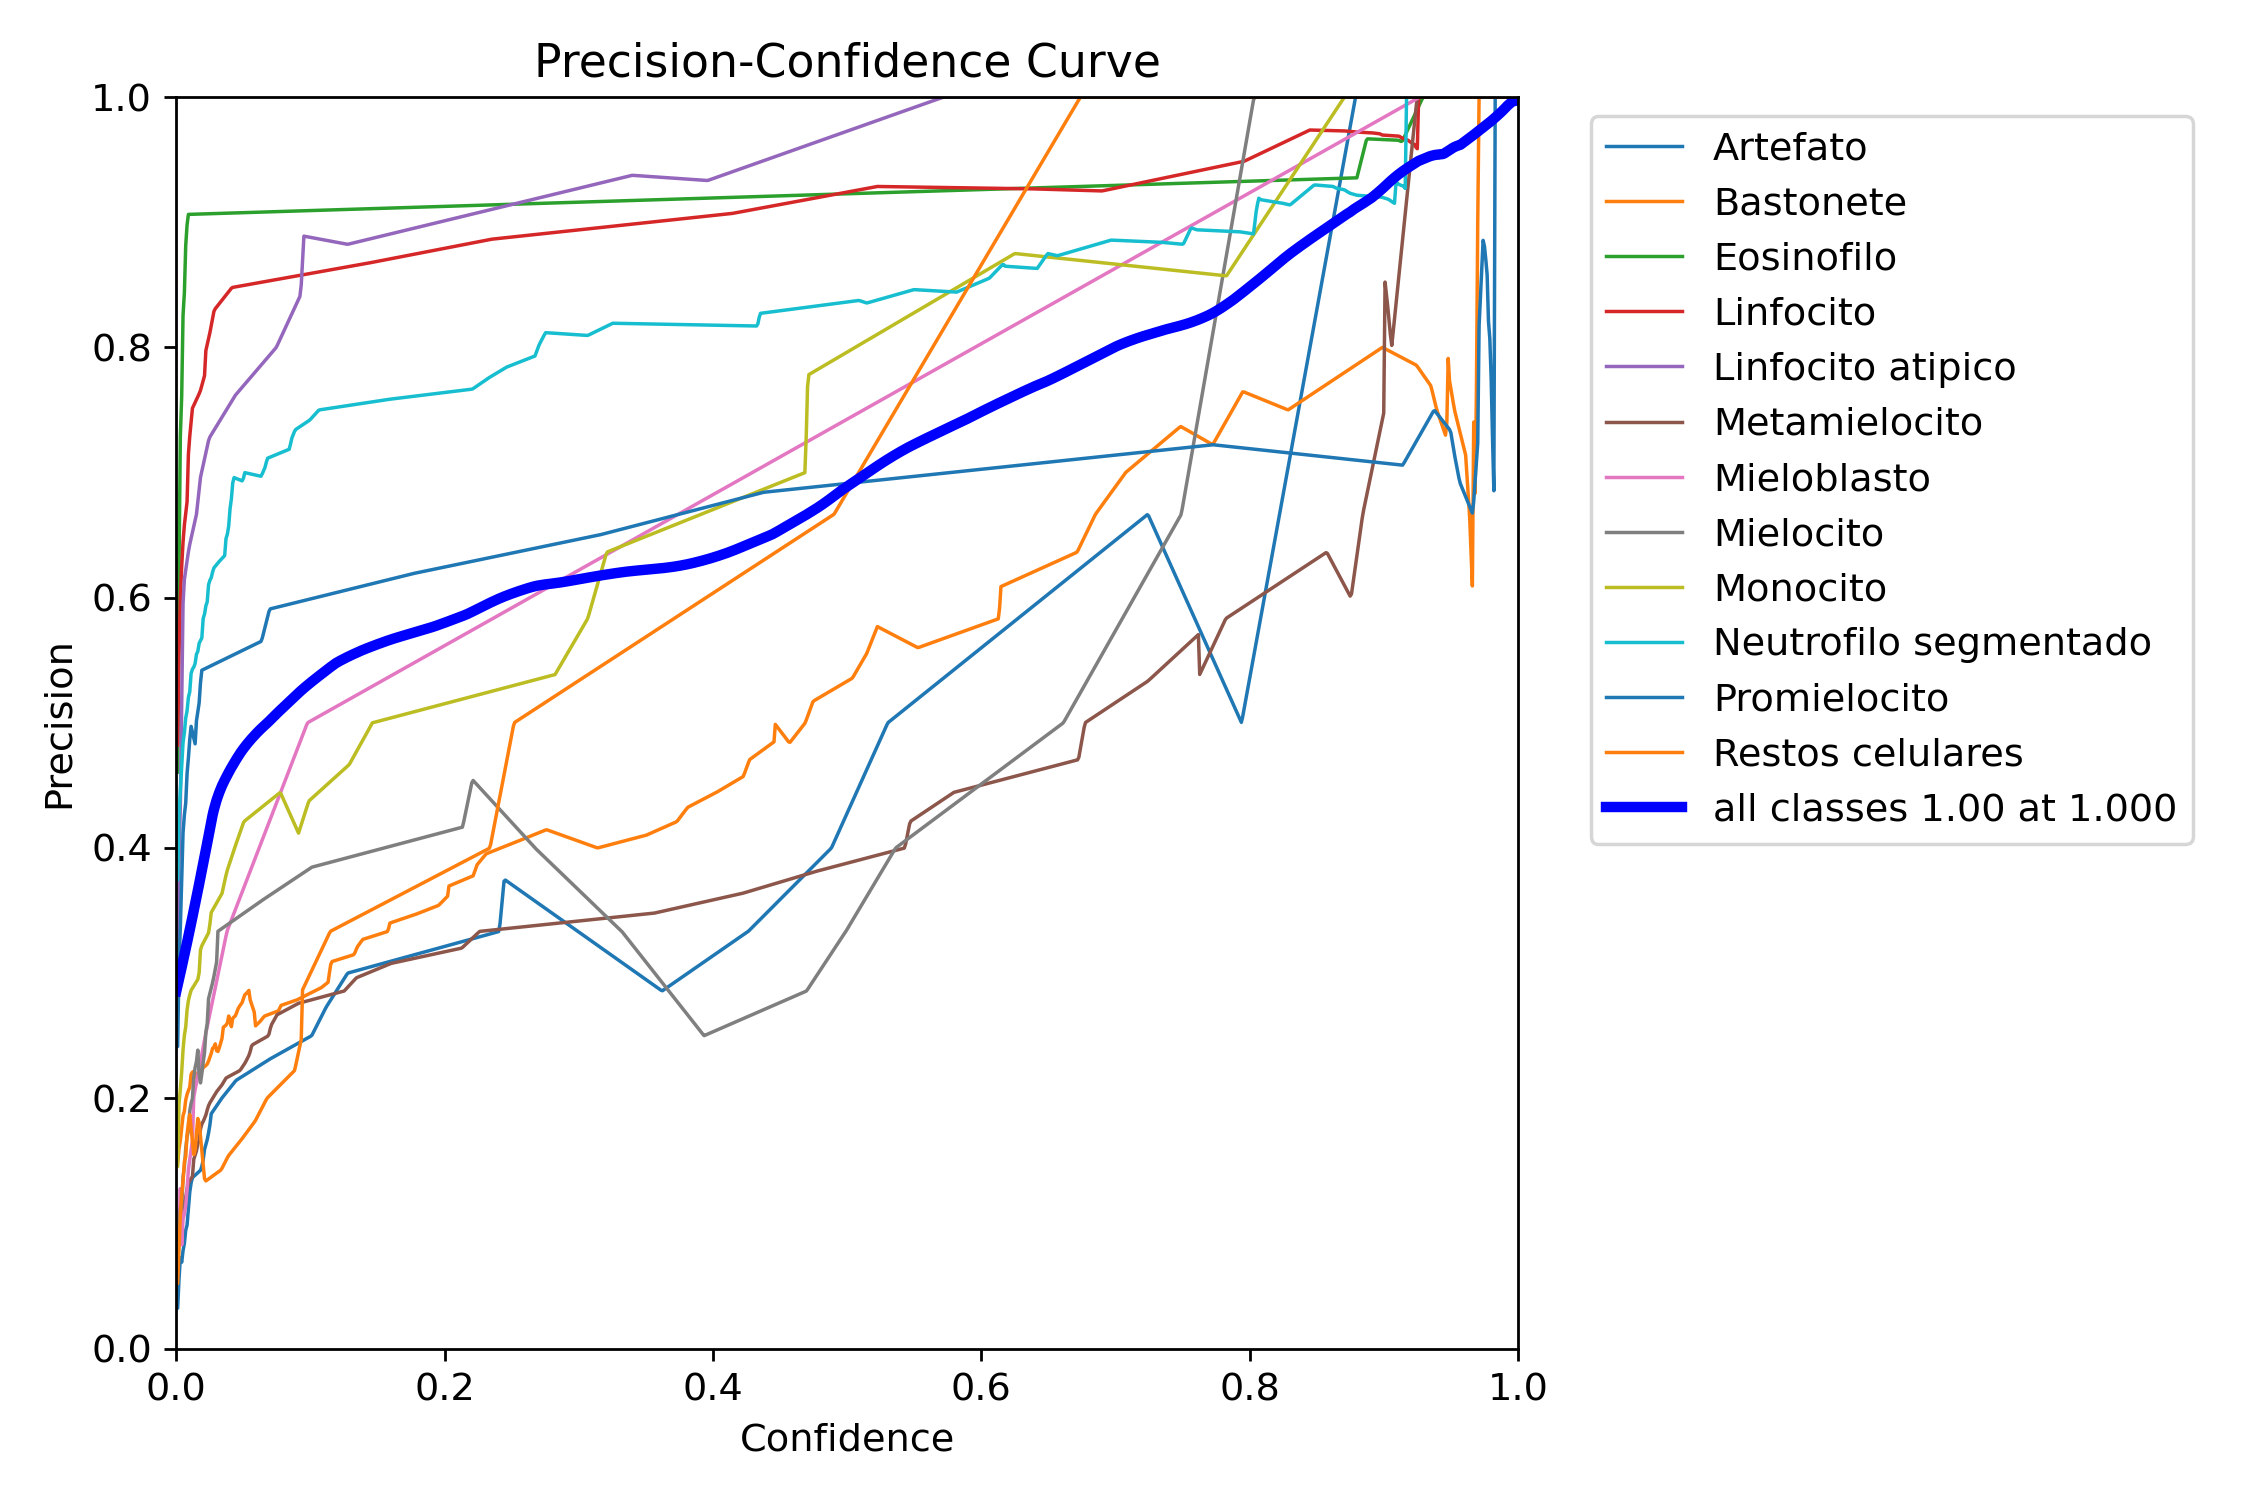

Displaying P_curve.png


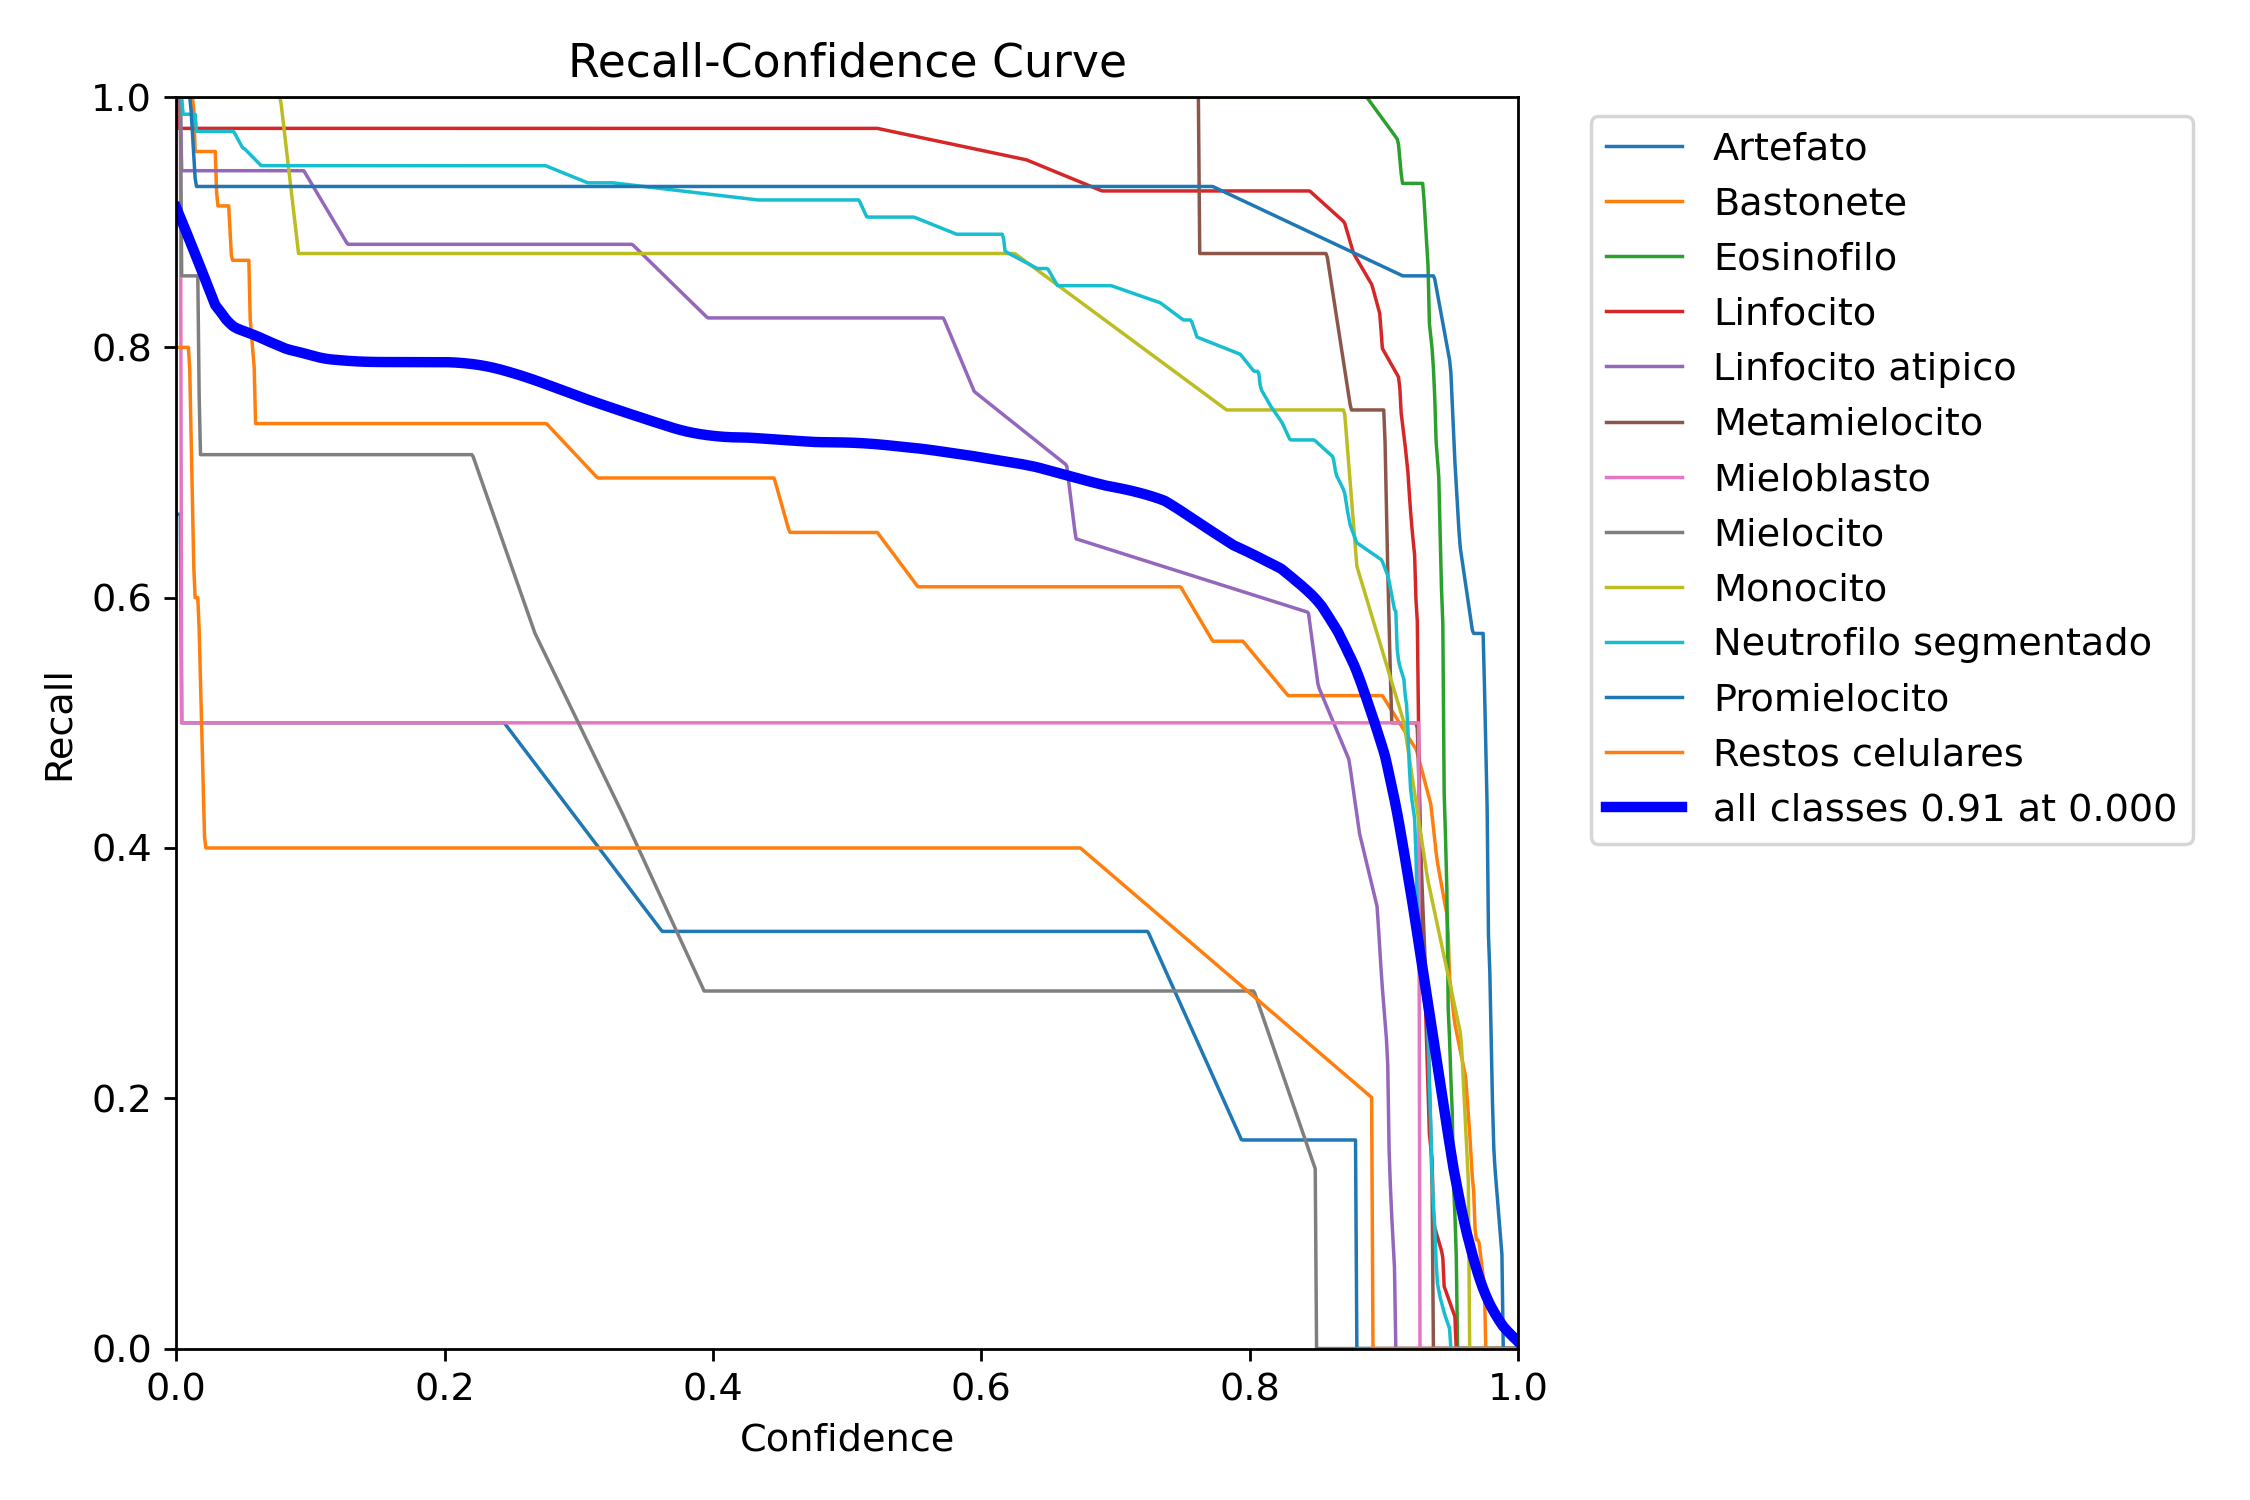

Displaying R_curve.png


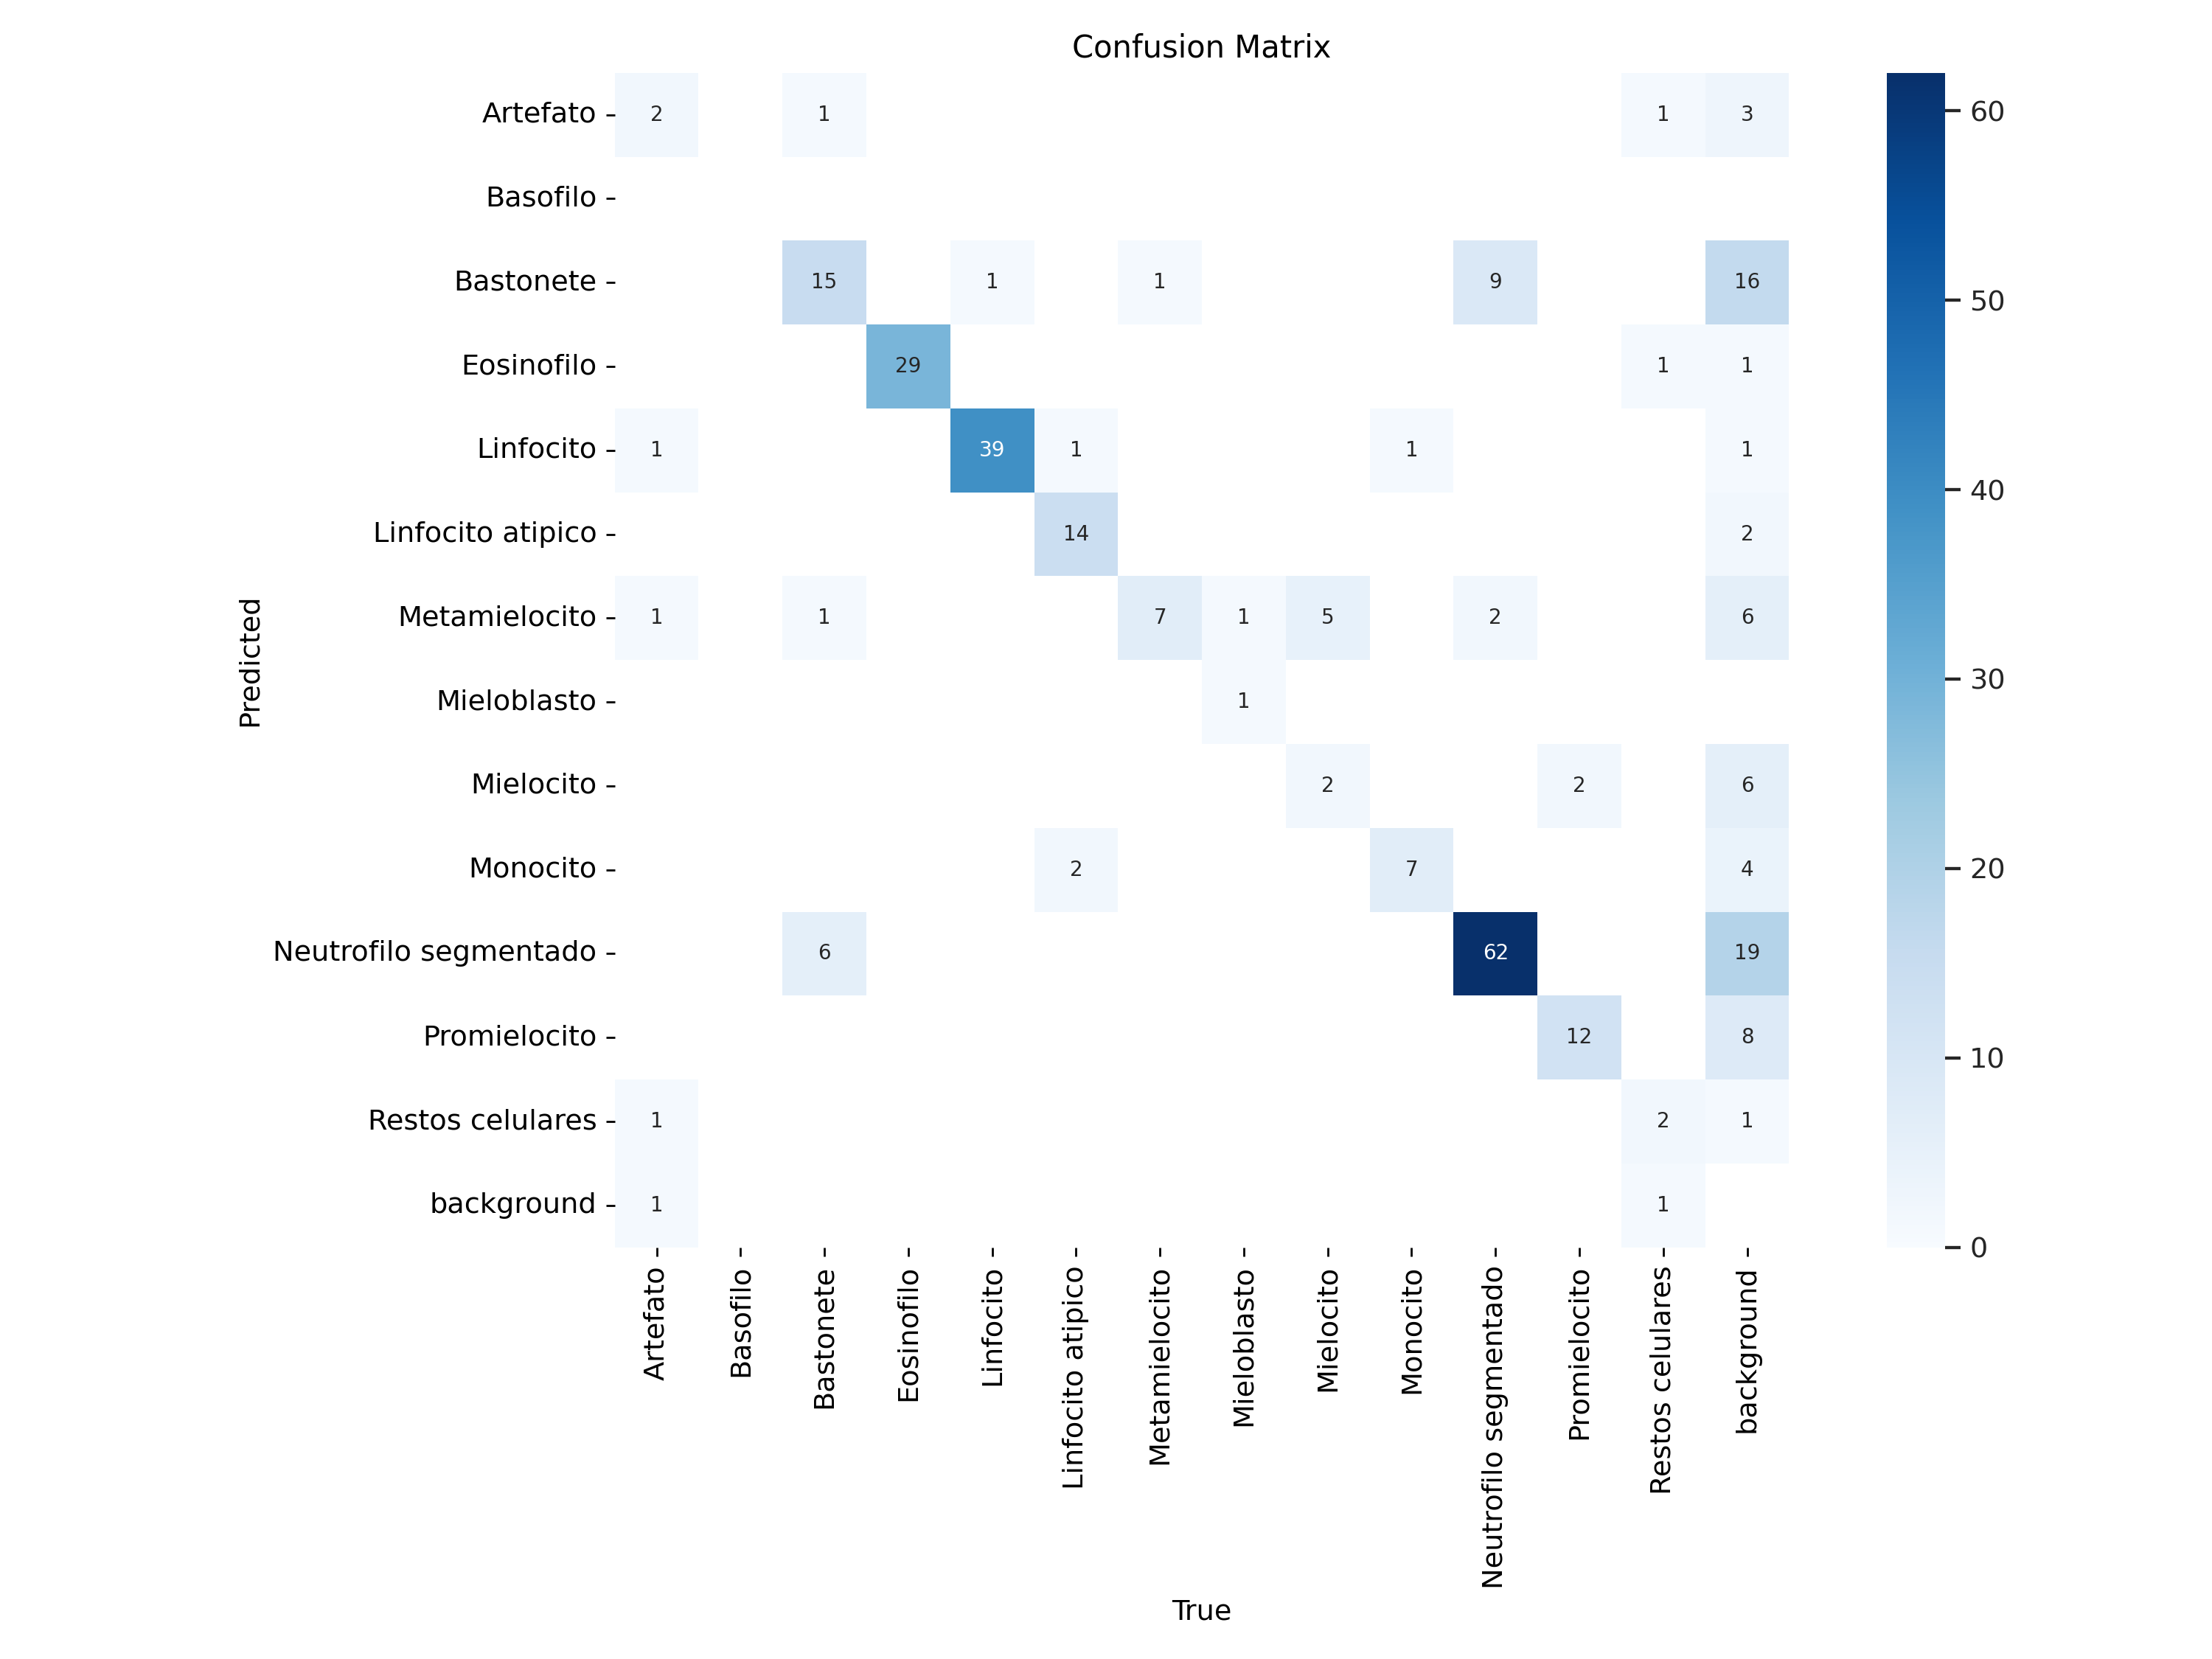

Displaying confusion_matrix.png


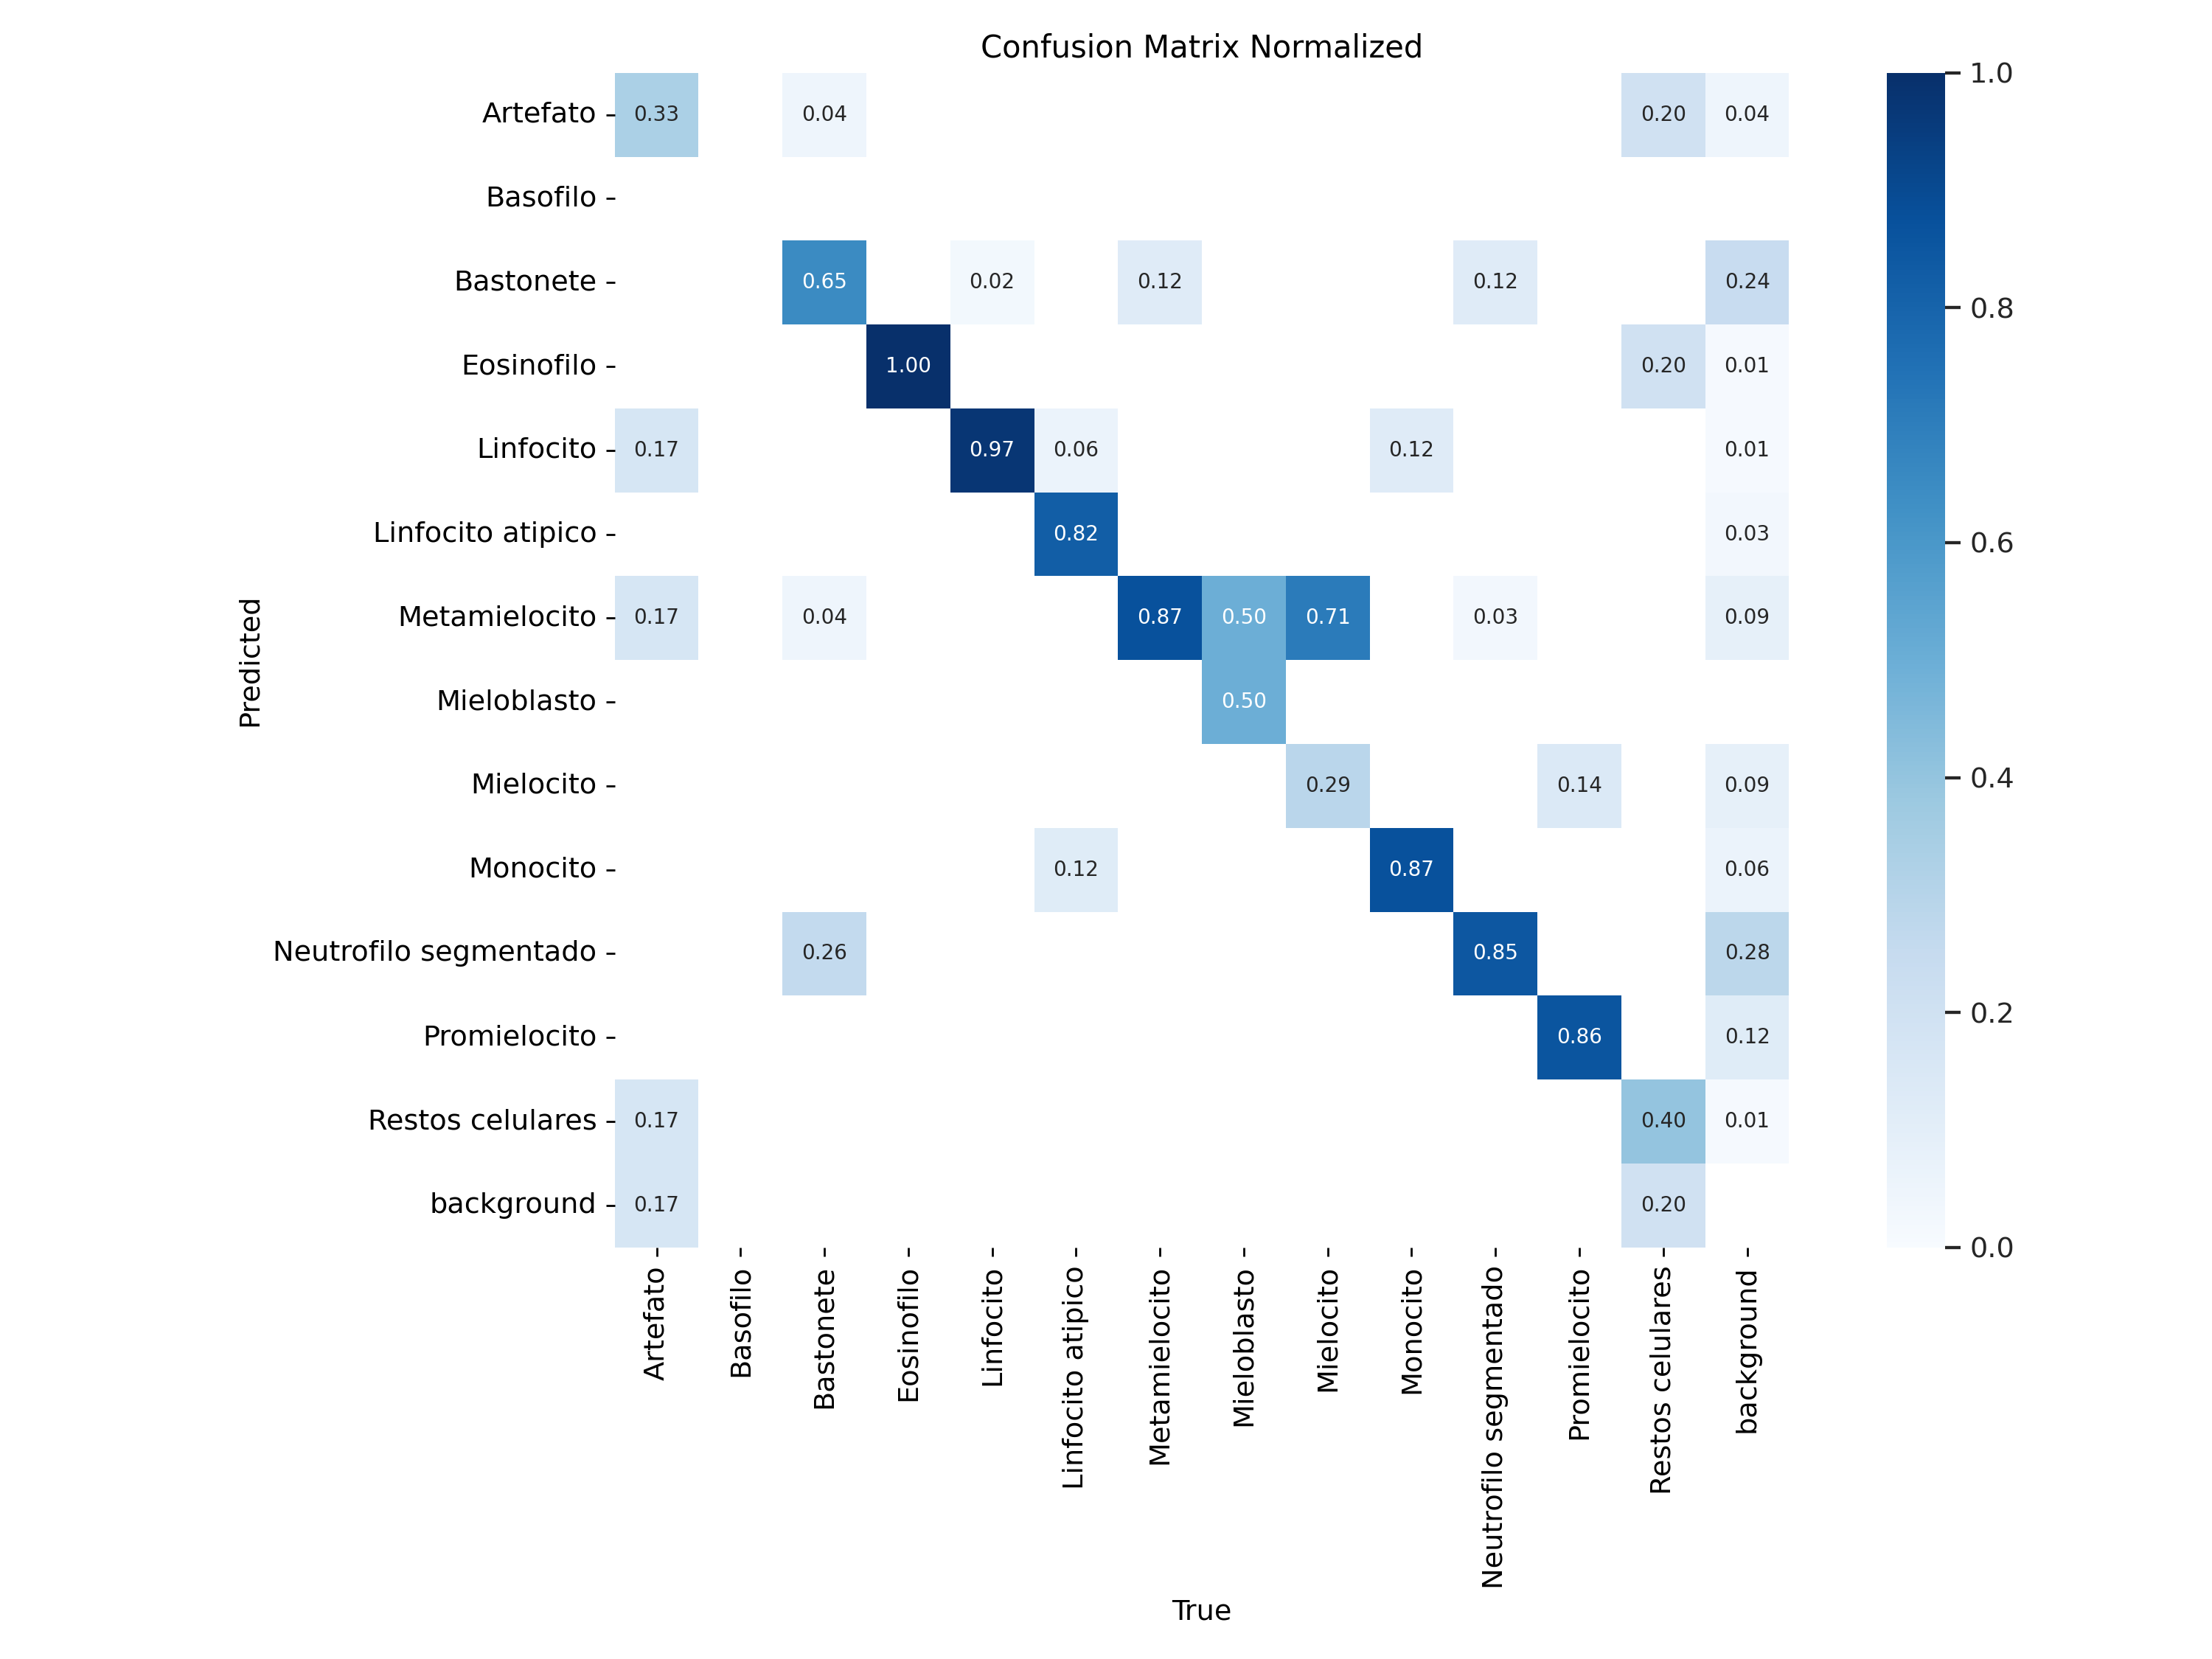

Displaying confusion_matrix_normalized.png


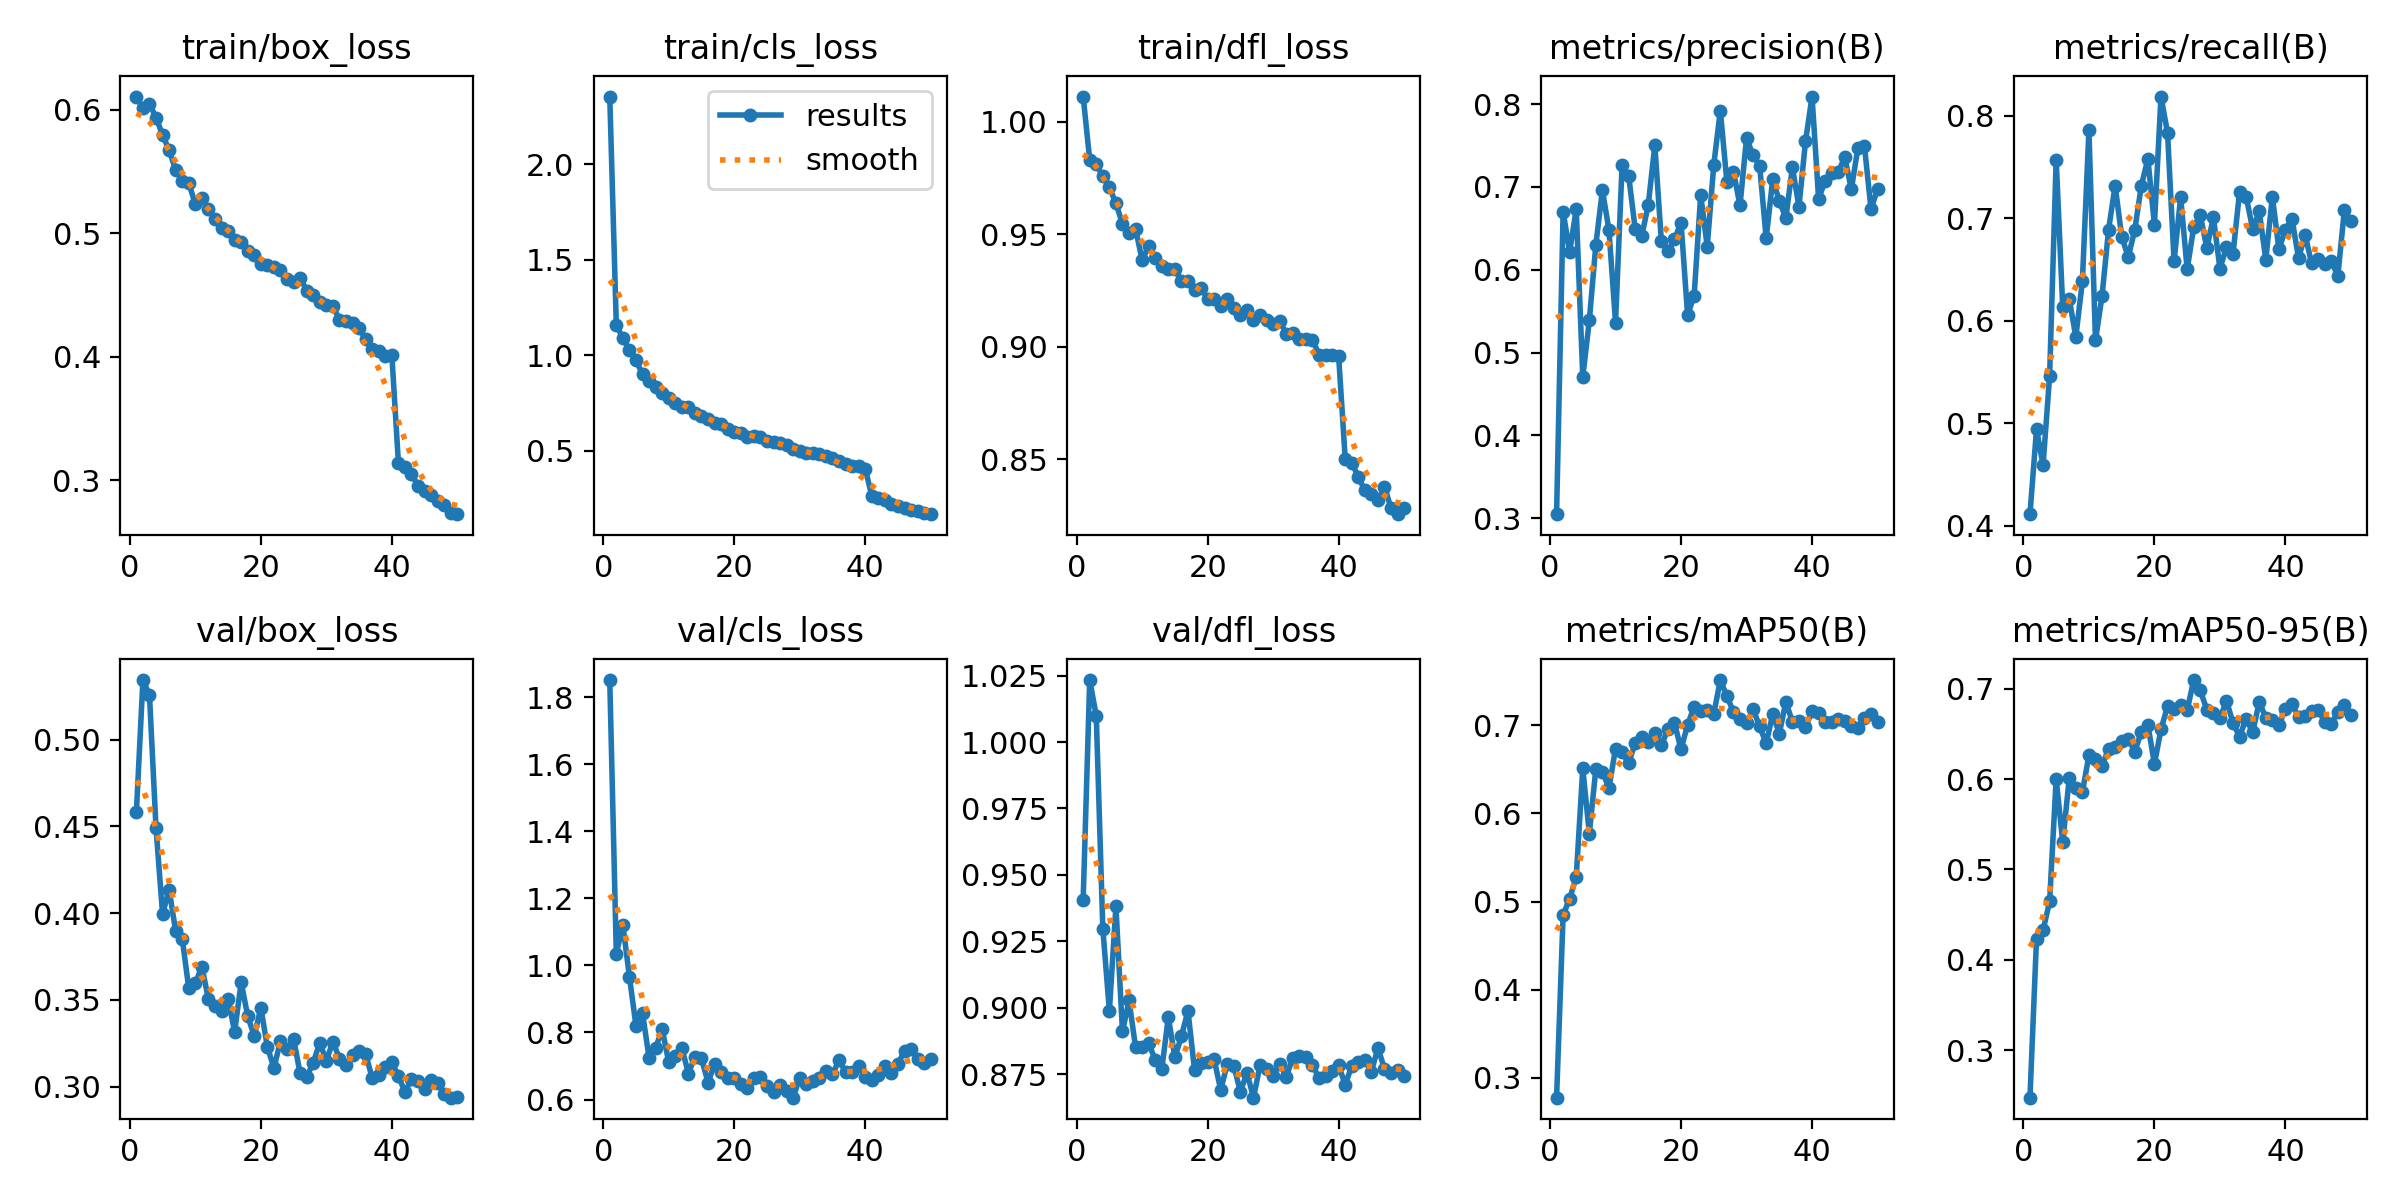

Displaying results.png


In [3]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import pandas as pd


# Define the file paths to the images
metrics_images = [
    "F1_curve.png",
    "PR_curve.png",
    "P_curve.png",
    "R_curve.png",
    "confusion_matrix.png",
    "confusion_matrix_normalized.png",
    "results.png",
]

# Display each image
for img in metrics_images:
    display(Image(filename=img))
    print(f"Displaying {img}")

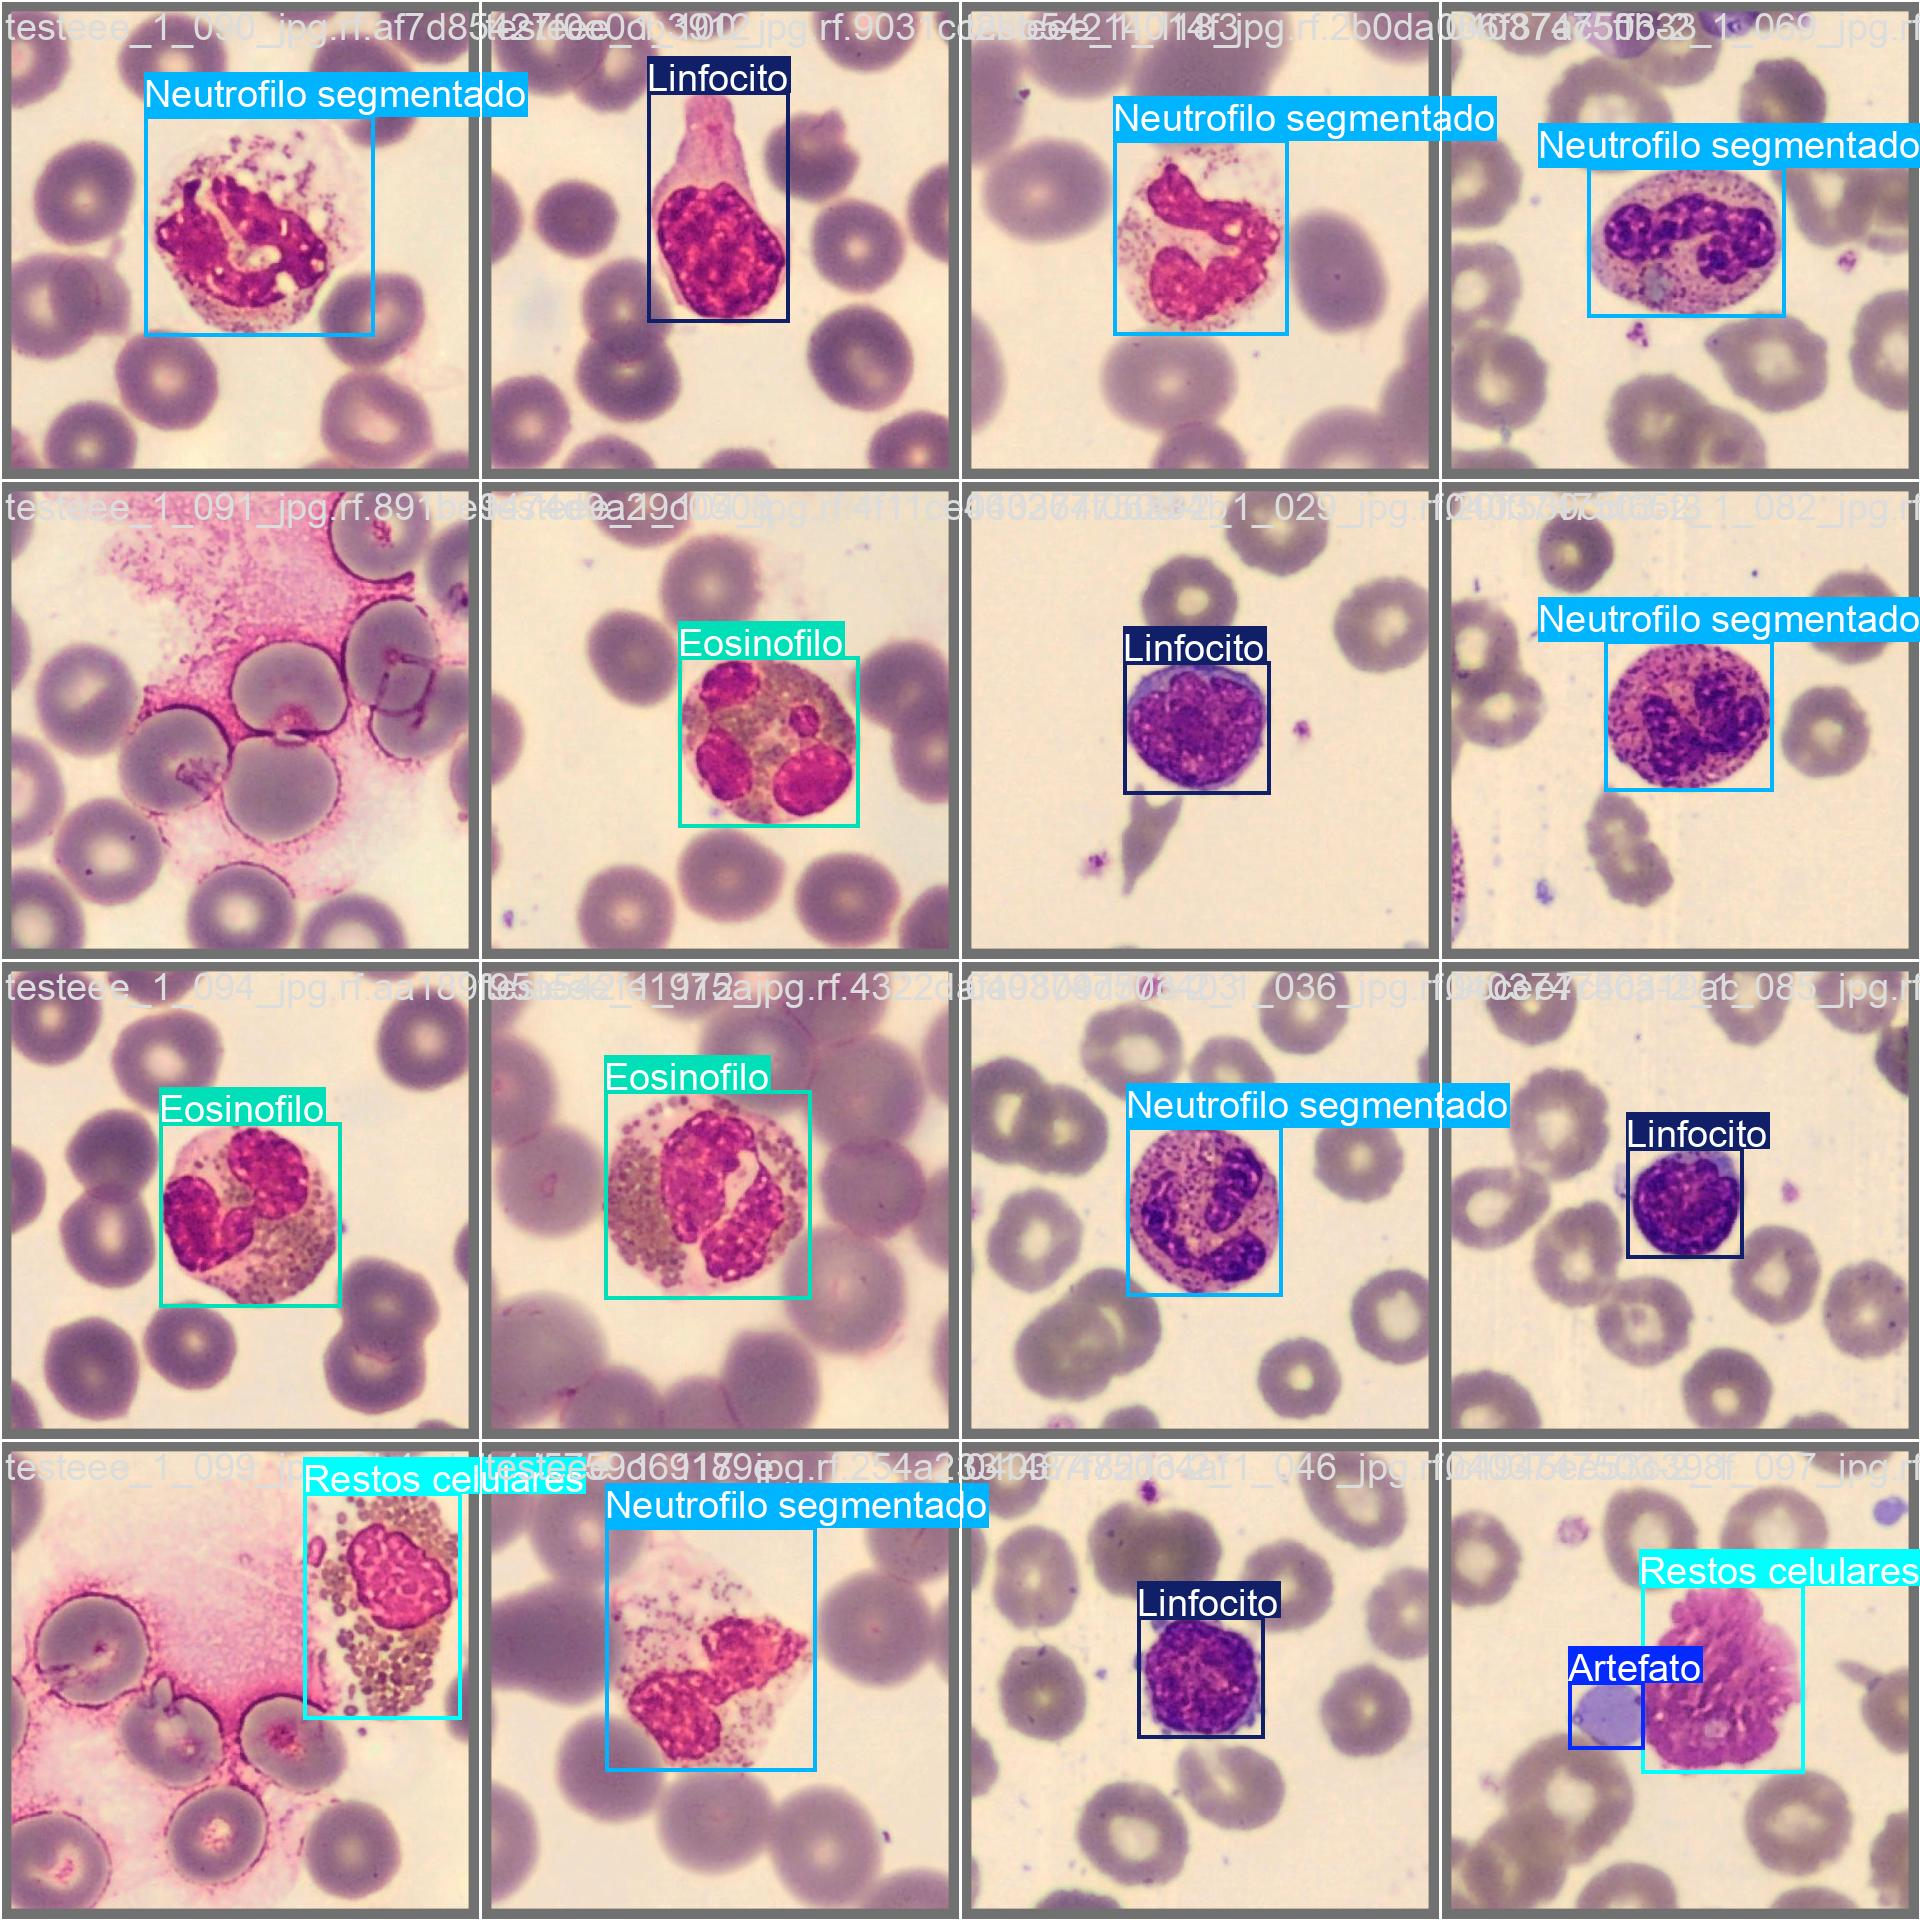

Displaying val_batch0_labels.jpg


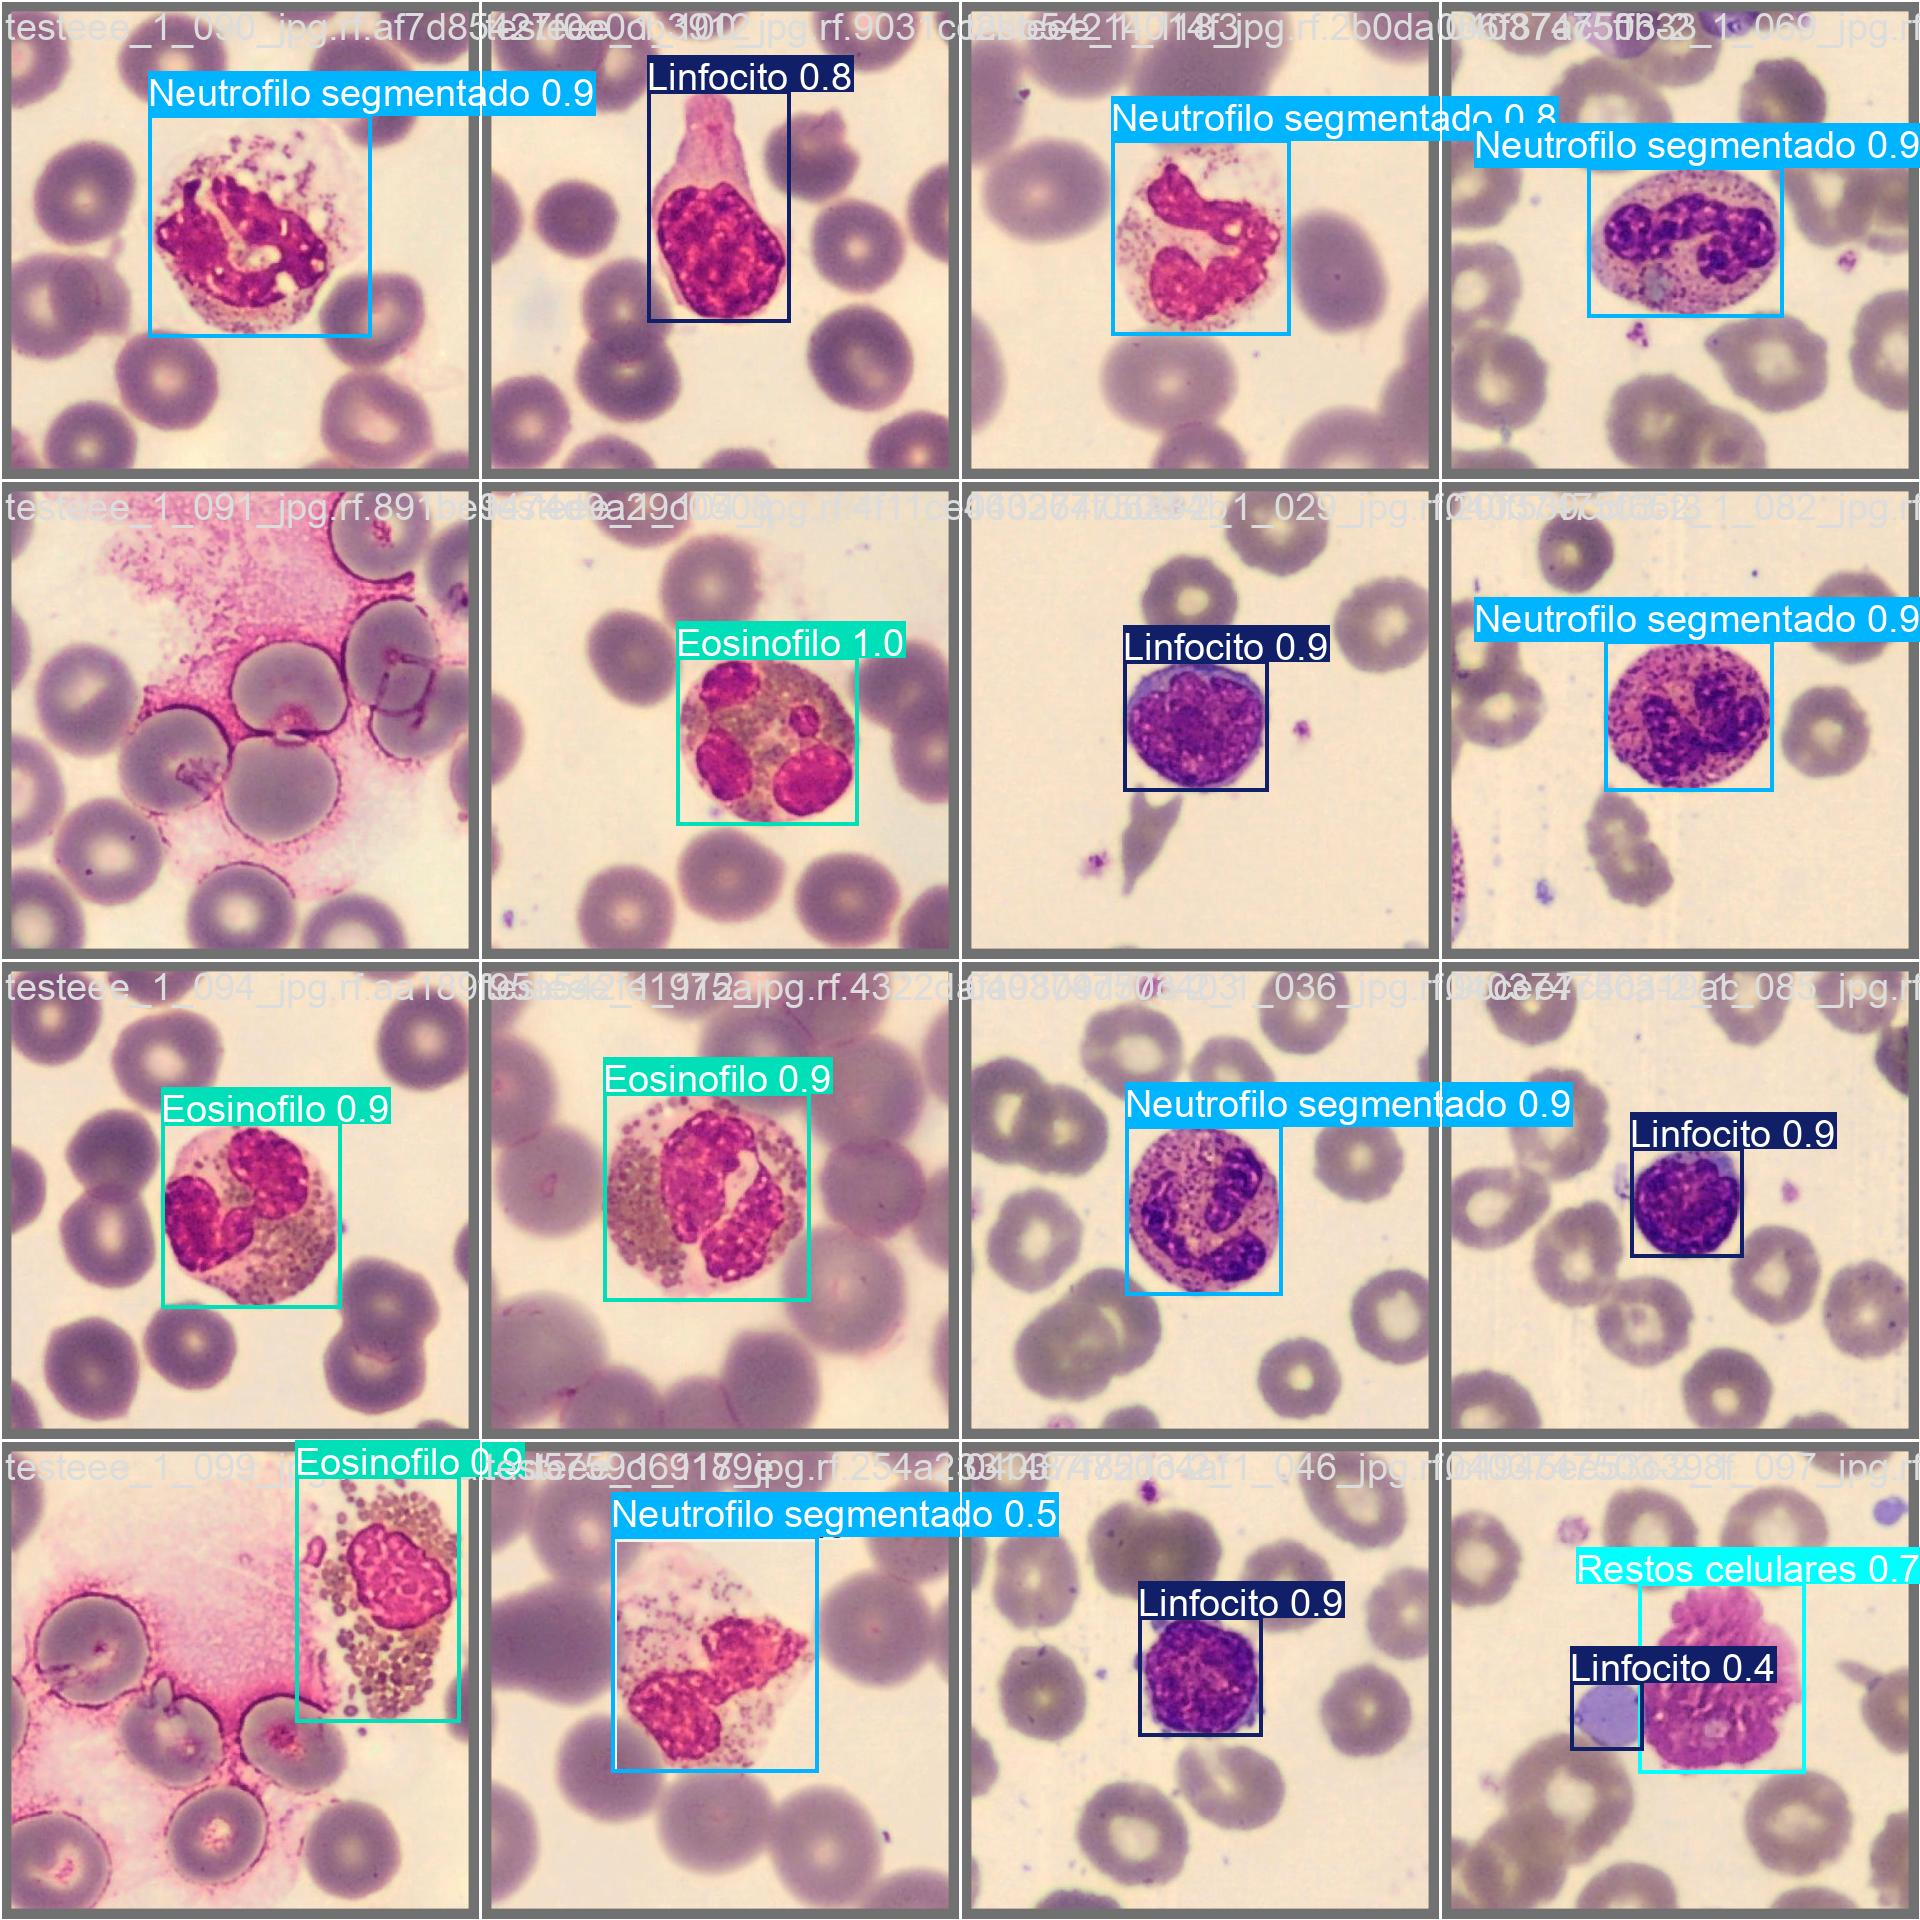

Displaying val_batch0_pred.jpg


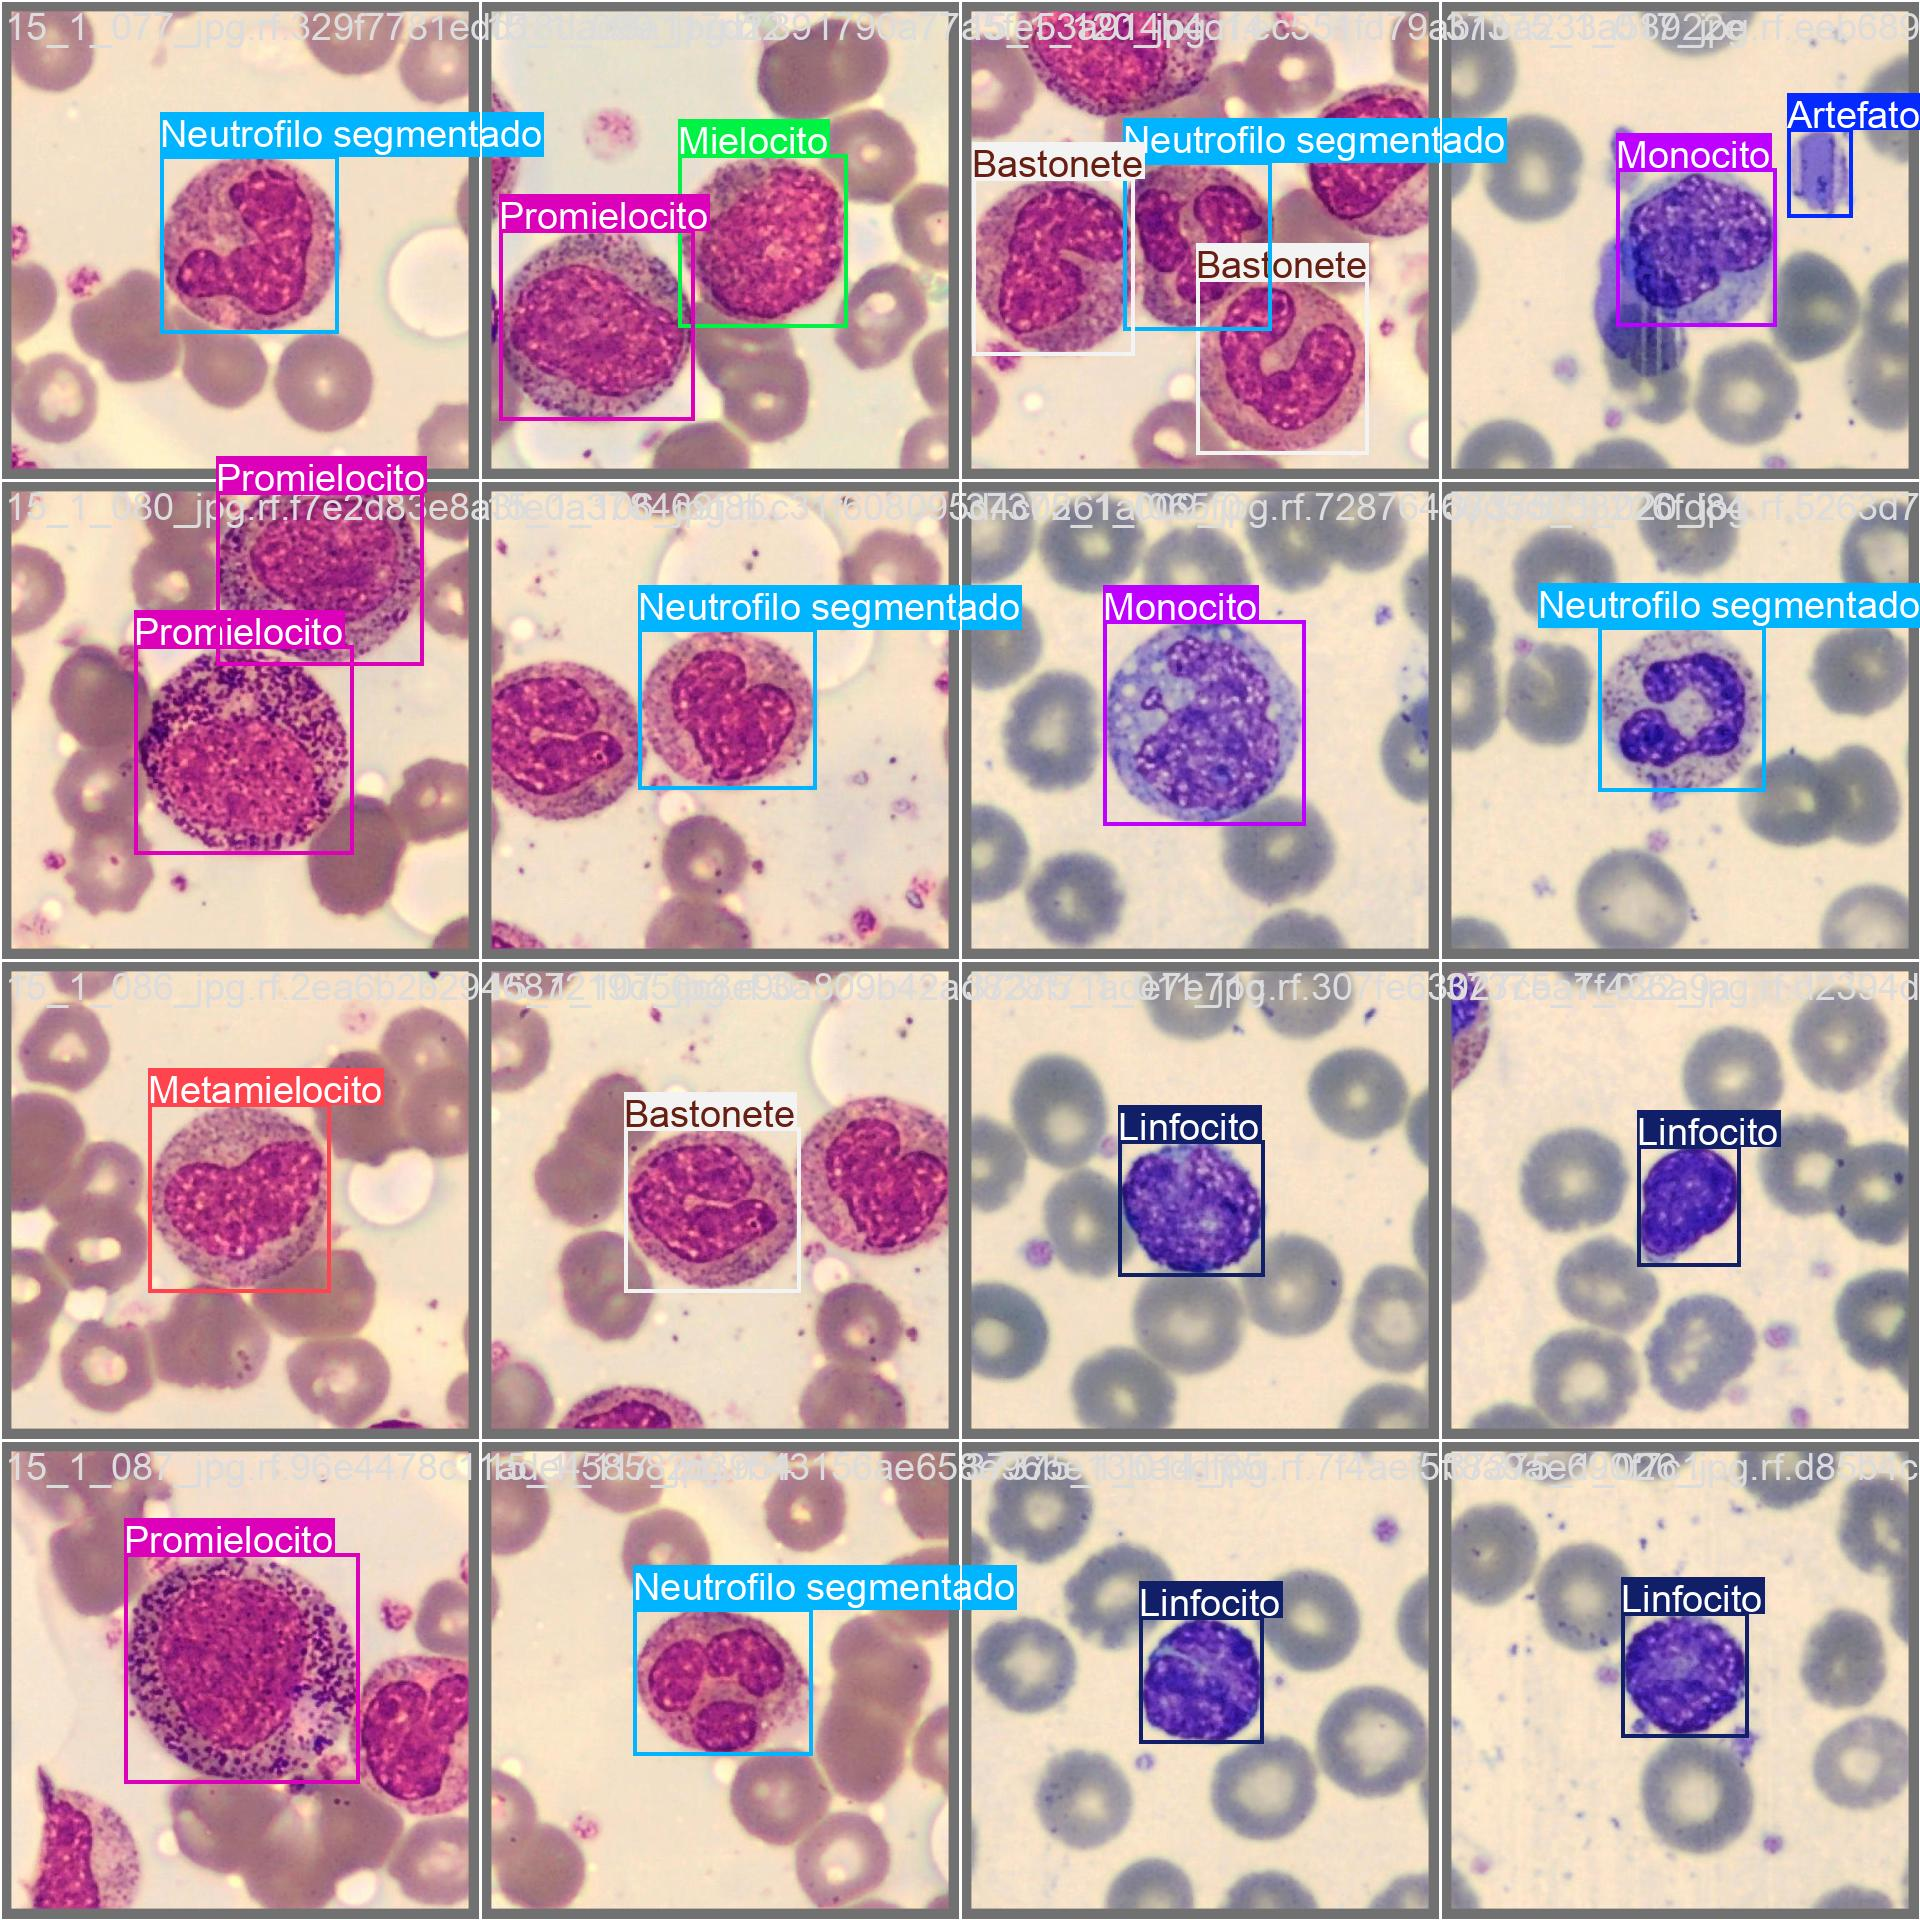

Displaying val_batch1_labels.jpg


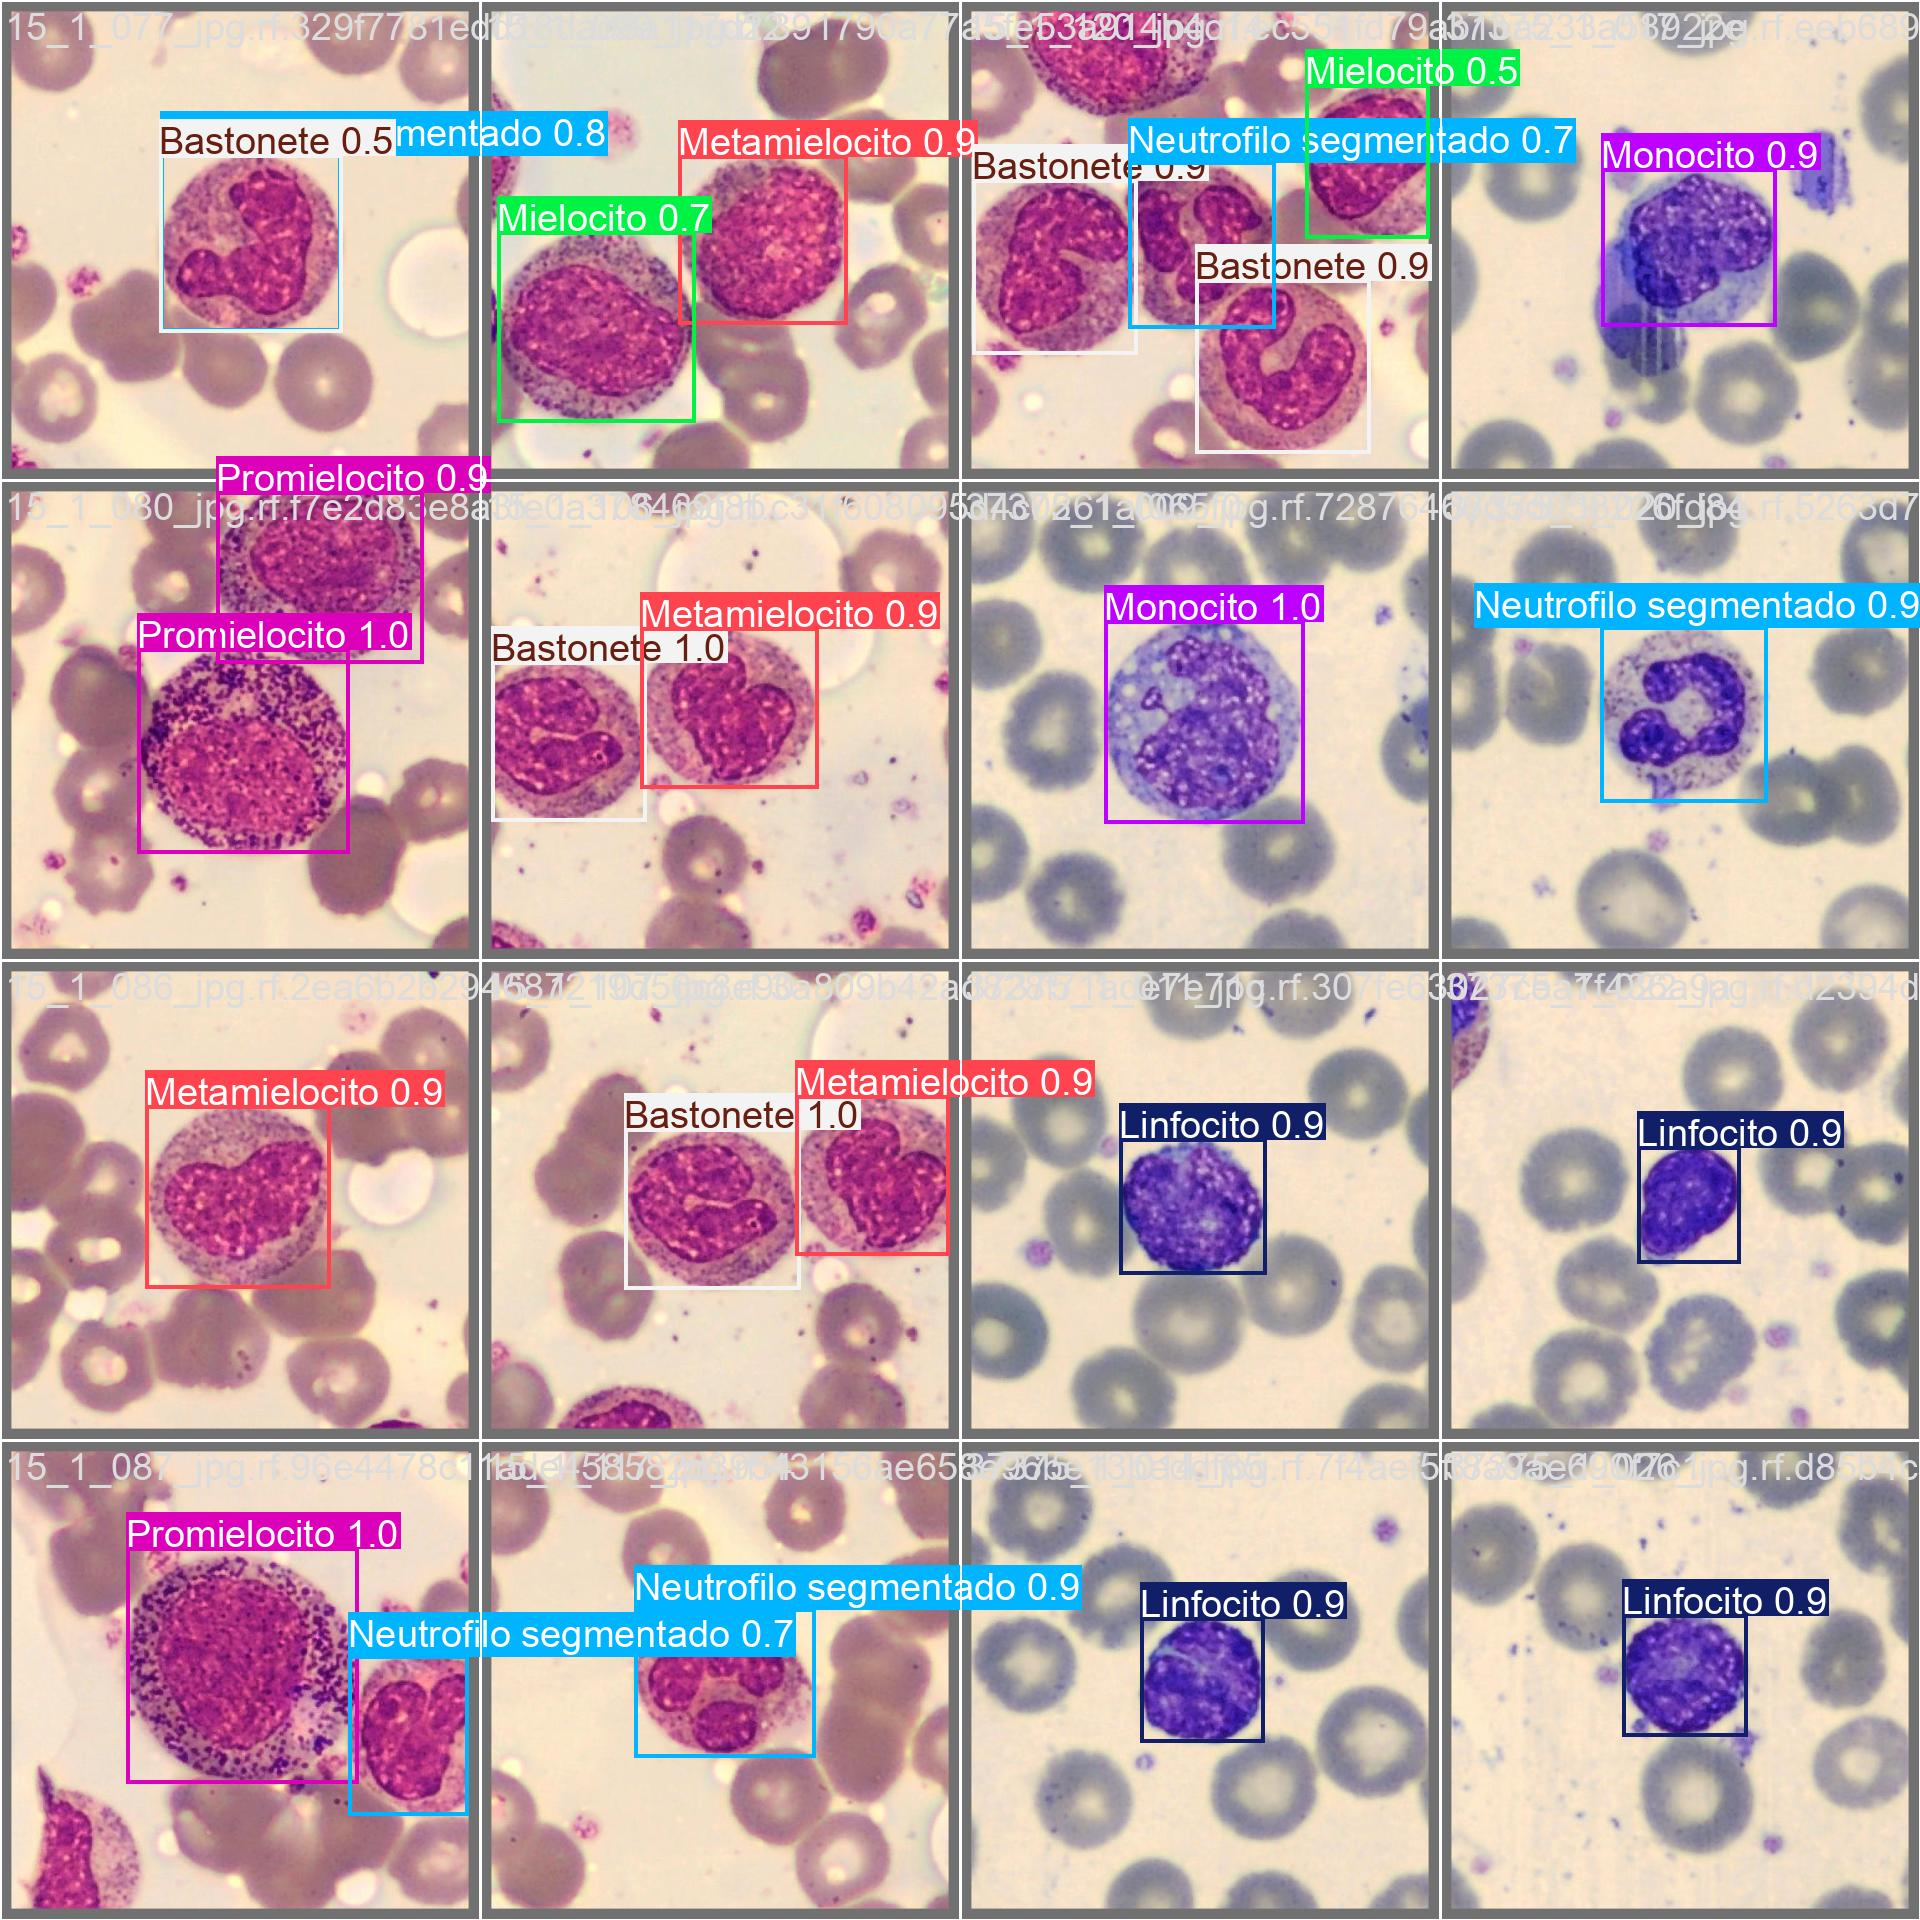

Displaying val_batch1_pred.jpg


In [4]:
# Example: Display validation prediction
val_images = [
    "val_batch0_labels.jpg",
    "val_batch0_pred.jpg",
    "val_batch1_labels.jpg",
    "val_batch1_pred.jpg",
]

for img in val_images:
    display(Image(filename=img))
    print(f"Displaying {img}")


In [5]:
!yolo task=detect mode=predict model=weights/best.pt conf=0.50 source=/lapix/visao_computacional-3/test/images save=True

Ultralytics 8.3.33 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA H100 80GB HBM3, 80995MiB)
YOLO11s summary (fused): 238 layers, 9,417,831 parameters, 0 gradients, 21.3 GFLOPs

image 1/217 /lapix/visao_computacional-3/test/images/0403747503-2_1_001_jpg.rf.05c9cbfa958b42540c6027bb86712990.jpg: 640x640 1 Neutrofilo segmentado, 26.8ms
image 2/217 /lapix/visao_computacional-3/test/images/0403747503-2_1_007_jpg.rf.ac117fcdb3111a5a8630ae4acb8b64ff.jpg: 640x640 1 Linfocito, 19.2ms
image 3/217 /lapix/visao_computacional-3/test/images/0403747503-2_1_011_jpg.rf.4076864cdc1b6363f0222ab9d3cde09e.jpg: 640x640 1 Neutrofilo segmentado, 6.8ms
image 4/217 /lapix/visao_computacional-3/test/images/0403747503-2_1_020_jpg.rf.76746ad4fb71296a68c1d3ca9d99b7bd.jpg: 640x640 1 Linfocito, 1 Neutrofilo segmentado, 7.5ms
image 5/217 /lapix/visao_computacional-3/test/images/0403747503-2_1_054_jpg.rf.b995c8050ddfd3a542da9f1bd0a22db2.jpg: 640x640 1 Neutrofilo segmentado, 9.8ms
image 6/217 /lapix/visao_computaciona

In [10]:
%cd ..

/lapix


In [11]:
!ls

PaddleSeg
arquivos
compartilhado
lamina_teste
results_6757_1_110_jpg.rf.346e446b3fbe17c5e36e0898502ee196.jpg
runs
visao_computacional-3
visao_computacional.ipynb
yolo11n.pt
yolo11s.pt


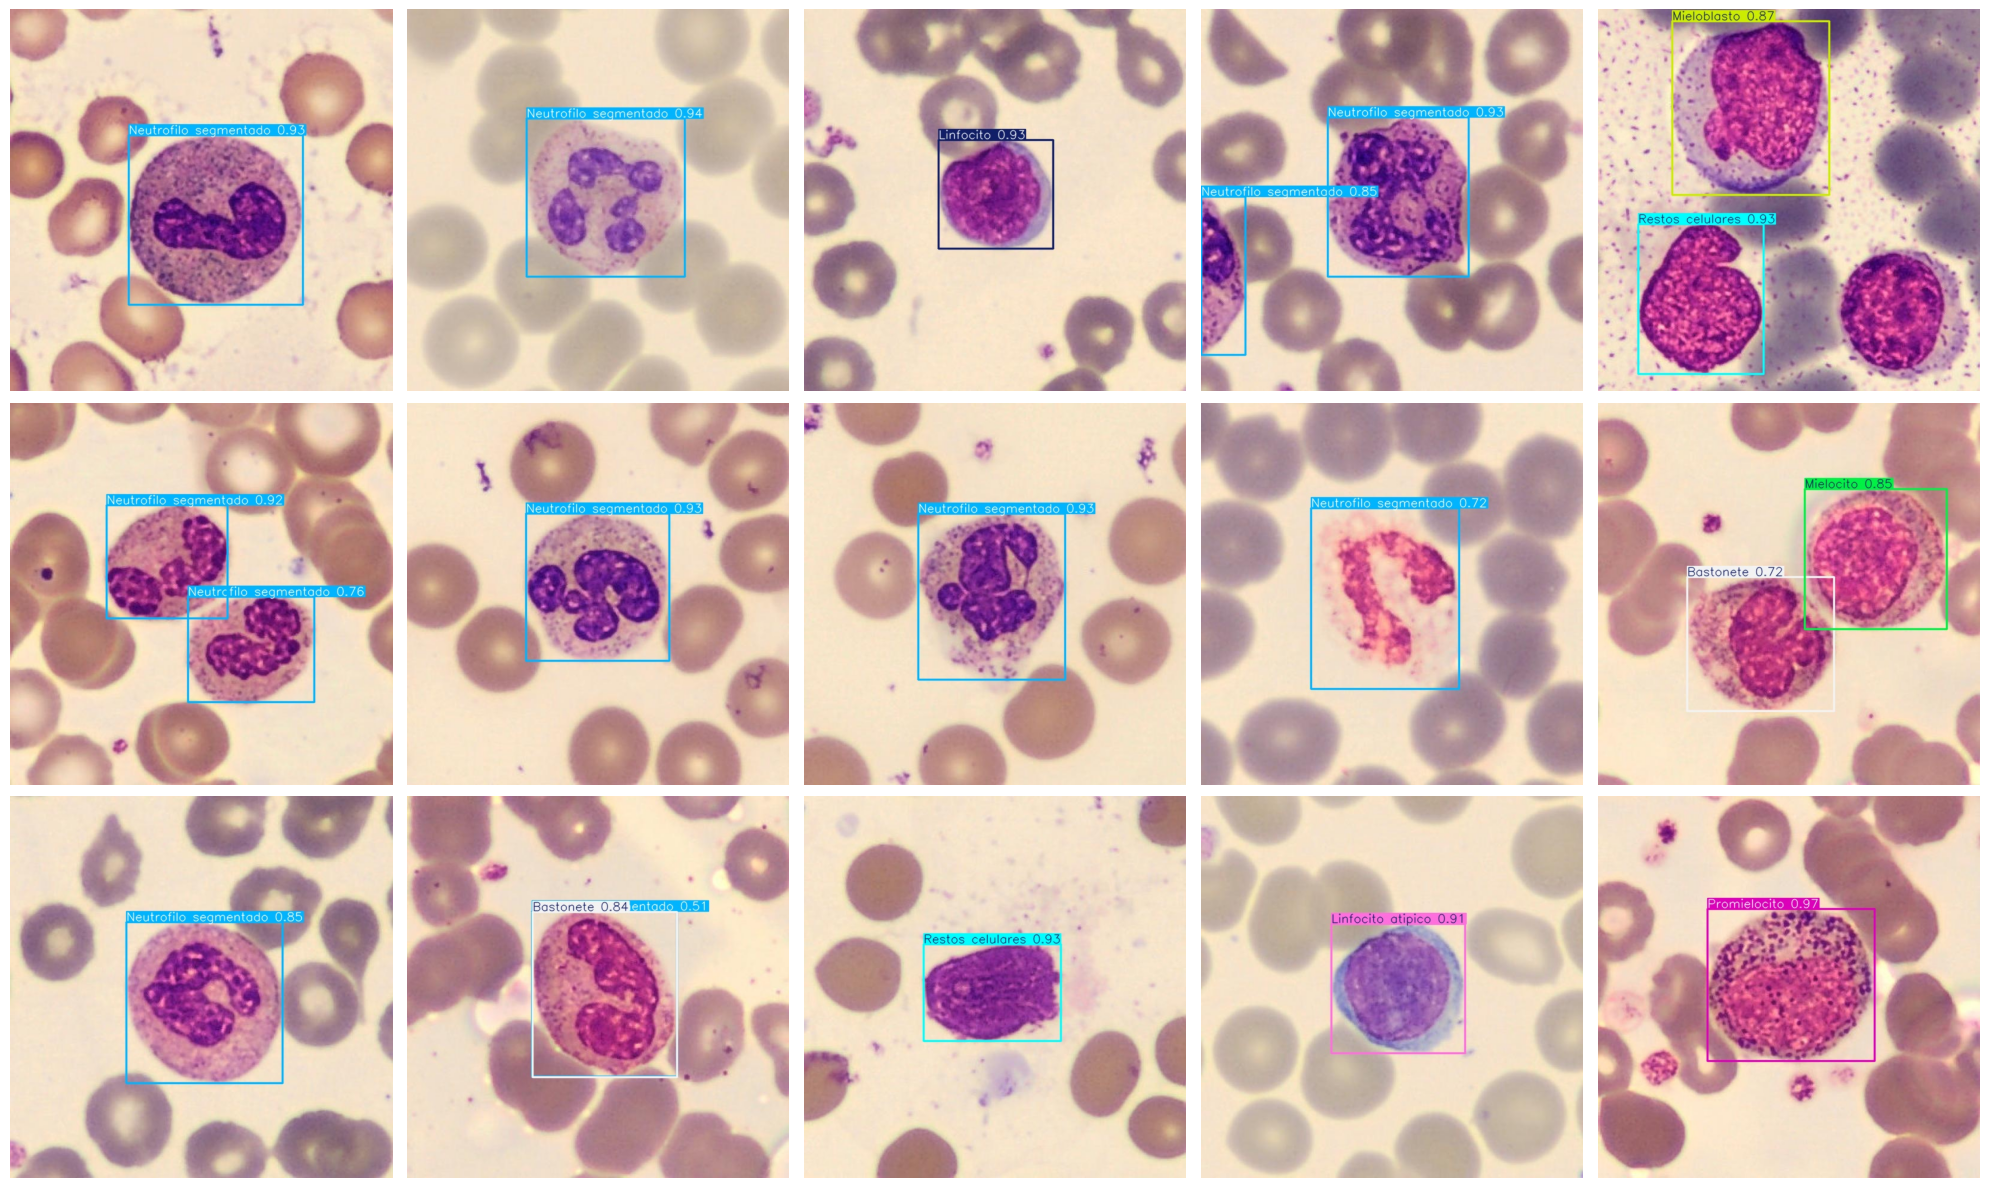

In [12]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Path to the folder containing images
image_folder = 'runs/detect/predict'

# Load all image file paths from the folder
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Display 15 images in a grid with 5 images per row
def display_images_in_grid(image_files, num_images=15, images_per_row=5):
    rows = (num_images + images_per_row - 1) // images_per_row  # Calculate required rows
    fig, axes = plt.subplots(rows, images_per_row, figsize=(20, 4 * rows))  # Adjust figure size
    axes = axes.flatten()  # Flatten axes to simplify indexing
    
    for i, ax in enumerate(axes):
        if i < len(image_files) and i < num_images:  # Check if enough images are available
            img = Image.open(image_files[i])  # Open the image
            ax.imshow(img)
            ax.axis('off')  # Hide axes
        else:
            ax.axis('off')  # Hide extra axes if fewer images
    
    plt.tight_layout()
    plt.show()

# Call the function
display_images_in_grid(image_files, num_images=15, images_per_row=5)

In [13]:
from ultralytics import YOLO

# Load your trained YOLO model
model = YOLO("runs/detect/train/weights/best.pt")

# Define path to the image file
source = "lamina_teste"  # Replace with the actual image path

# Run inference on the image
results = model(source)  # Perform inference

for result in results:
    boxes = result.boxes.xyxy  # Bounding boxes (x1, y1, x2, y2)
    confs = result.boxes.conf  # Confidence scores
    classes = result.boxes.cls  # Class IDs

    print("Boxes:", boxes)
    print("Confidence Scores:", confs)
    print("Class IDs:", classes)


image 1/121 /lapix/lamina_teste/05511209303a_1_001.jpg: 640x640 1 Neutrofilo segmentado, 11.4ms


Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 2/121 /lapix/lamina_teste/05511209303a_1_002.jpg: 640x640 1 Neutrofilo segmentado, 7.5ms
image 3/121 /lapix/lamina_teste/05511209303a_1_003.jpg: 640x640 1 Neutrofilo segmentado, 6.1ms
image 4/121 /lapix/lamina_teste/05511209303a_1_004.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 5/121 /lapix/lamina_teste/05511209303a_1_005.jpg: 640x640 1 Monocito, 5.7ms
image 6/121 /lapix/lamina_teste/05511209303a_1_006.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 7/121 /lapix/lamina_teste/05511209303a_1_007.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 8/121 /lapix/lamina_teste/05511209303a_1_008.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 9/121 /lapix/lamina_teste/05511209303a_1_009.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 10/121 /lapix/lamina_teste/05511209303a_1_010.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 11/121 /lapix/lamina_teste/05511209303a_1_011.jpg: 640x640 1 Artefato, 5.8ms
image 12/121 /lapix/lamina_teste/05511209303a_1_012.jpg: 640x640 1 Neutrof

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 19/121 /lapix/lamina_teste/05511209303a_1_019.jpg: 640x640 1 Neutrofilo segmentado, 5.5ms
image 20/121 /lapix/lamina_teste/05511209303a_1_020.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 21/121 /lapix/lamina_teste/05511209303a_1_021.jpg: 640x640 1 Neutrofilo segmentado, 5.5ms
image 22/121 /lapix/lamina_teste/05511209303a_1_022.jpg: 640x640 1 Neutrofilo segmentado, 5.5ms
image 23/121 /lapix/lamina_teste/05511209303a_1_023.jpg: 640x640 1 Neutrofilo segmentado, 5.5ms
image 24/121 /lapix/lamina_teste/05511209303a_1_024.jpg: 640x640 1 Neutrofilo segmentado, 5.5ms
image 25/121 /lapix/lamina_teste/05511209303a_1_025.jpg: 640x640 1 Artefato, 5.5ms
image 26/121 /lapix/lamina_teste/05511209303a_1_026.jpg: 640x640 1 Linfocito, 1 Linfocito atipico, 5.5ms
image 27/121 /lapix/lamina_teste/05511209303a_1_027.jpg: 640x640 1 Linfocito atipico, 5.5ms
image 28/121 /lapix/lamina_teste/05511209303a_1_028.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 29/121 /lapix/lamina_teste/05511209303a_1_

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG d

image 37/121 /lapix/lamina_teste/05511209303a_1_037.jpg: 640x640 1 Neutrofilo segmentado, 6.6ms
image 38/121 /lapix/lamina_teste/05511209303a_1_038.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 39/121 /lapix/lamina_teste/05511209303a_1_039.jpg: 640x640 1 Neutrofilo segmentado, 6.4ms
image 40/121 /lapix/lamina_teste/05511209303a_1_040.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 41/121 /lapix/lamina_teste/05511209303a_1_041.jpg: 640x640 2 Neutrofilo segmentados, 5.9ms
image 42/121 /lapix/lamina_teste/05511209303a_1_042.jpg: 640x640 1 Bastonete, 1 Neutrofilo segmentado, 5.7ms
image 43/121 /lapix/lamina_teste/05511209303a_1_043.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 44/121 /lapix/lamina_teste/05511209303a_1_044.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 45/121 /lapix/lamina_teste/05511209303a_1_045.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 46/121 /lapix/lamina_teste/05511209303a_1_046.jpg: 640x640 1 Linfocito, 5.8ms
image 47/121 /lapix/lamina_teste/05511

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG d

image 55/121 /lapix/lamina_teste/05511209303a_1_055.jpg: 640x640 1 Restos celulares, 5.6ms
image 56/121 /lapix/lamina_teste/05511209303a_1_056.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 57/121 /lapix/lamina_teste/05511209303a_1_057.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 58/121 /lapix/lamina_teste/05511209303a_1_058.jpg: 640x640 1 Neutrofilo segmentado, 5.5ms
image 59/121 /lapix/lamina_teste/05511209303a_1_059.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 60/121 /lapix/lamina_teste/05511209303a_1_060.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 61/121 /lapix/lamina_teste/05511209303a_1_061.jpg: 640x640 1 Bastonete, 5.7ms
image 62/121 /lapix/lamina_teste/05511209303a_1_062.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 63/121 /lapix/lamina_teste/05511209303a_1_063.jpg: 640x640 (no detections), 5.7ms
image 64/121 /lapix/lamina_teste/05511209303a_1_064.jpg: 640x640 1 Neutrofilo segmentado, 5.8ms
image 65/121 /lapix/lamina_teste/05511209303a_1_065.jpg: 640x640 

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 73/121 /lapix/lamina_teste/05511209303a_1_073.jpg: 640x640 1 Neutrofilo segmentado, 5.8ms
image 74/121 /lapix/lamina_teste/05511209303a_1_074.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 75/121 /lapix/lamina_teste/05511209303a_1_075.jpg: 640x640 1 Neutrofilo segmentado, 5.8ms
image 76/121 /lapix/lamina_teste/05511209303a_1_076.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 77/121 /lapix/lamina_teste/05511209303a_1_077.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 78/121 /lapix/lamina_teste/05511209303a_1_078.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 79/121 /lapix/lamina_teste/05511209303a_1_079.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 80/121 /lapix/lamina_teste/05511209303a_1_080.jpg: 640x640 1 Neutrofilo segmentado, 5.8ms
image 81/121 /lapix/lamina_teste/05511209303a_1_081.jpg: 640x640 1 Linfocito, 5.6ms
image 82/121 /lapix/lamina_teste/05511209303a_1_082.jpg: 640x640 1 Neutrofilo segmentado, 5.8ms
image 83/121 /lapix/lamina_teste/05511209303a_1_083.

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 89/121 /lapix/lamina_teste/05511209303a_1_089.jpg: 640x640 1 Neutrofilo segmentado, 9.6ms
image 90/121 /lapix/lamina_teste/05511209303a_1_090.jpg: 640x640 1 Neutrofilo segmentado, 7.6ms
image 91/121 /lapix/lamina_teste/05511209303a_1_091.jpg: 640x640 1 Bastonete, 1 Neutrofilo segmentado, 10.2ms
image 92/121 /lapix/lamina_teste/05511209303a_1_092.jpg: 640x640 1 Restos celulares, 9.3ms
image 93/121 /lapix/lamina_teste/05511209303a_1_093.jpg: 640x640 1 Linfocito atipico, 9.0ms
image 94/121 /lapix/lamina_teste/05511209303a_1_094.jpg: 640x640 1 Neutrofilo segmentado, 8.0ms
image 95/121 /lapix/lamina_teste/05511209303a_1_095.jpg: 640x640 1 Neutrofilo segmentado, 10.0ms
image 96/121 /lapix/lamina_teste/05511209303a_1_096.jpg: 640x640 1 Neutrofilo segmentado, 9.3ms
image 97/121 /lapix/lamina_teste/05511209303a_1_097.jpg: 640x640 1 Neutrofilo segmentado, 8.7ms
image 98/121 /lapix/lamina_teste/05511209303a_1_098.jpg: 640x640 1 Neutrofilo segmentado, 9.0ms
image 99/121 /lapix/lamina_teste/0

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 100/121 /lapix/lamina_teste/05511209303a_1_100.jpg: 640x640 1 Neutrofilo segmentado, 9.2ms
image 101/121 /lapix/lamina_teste/05511209303a_1_101.jpg: 640x640 2 Neutrofilo segmentados, 7.8ms
image 102/121 /lapix/lamina_teste/05511209303a_1_102.jpg: 640x640 2 Neutrofilo segmentados, 10.2ms
image 103/121 /lapix/lamina_teste/05511209303a_1_103.jpg: 640x640 1 Neutrofilo segmentado, 10.0ms
image 104/121 /lapix/lamina_teste/05511209303a_1_104.jpg: 640x640 1 Neutrofilo segmentado, 9.3ms
image 105/121 /lapix/lamina_teste/05511209303a_1_105.jpg: 640x640 1 Neutrofilo segmentado, 9.4ms
image 106/121 /lapix/lamina_teste/05511209303a_1_106.jpg: 640x640 (no detections), 8.5ms
image 107/121 /lapix/lamina_teste/05511209303a_1_107.jpg: 640x640 1 Restos celulares, 9.7ms
image 108/121 /lapix/lamina_teste/05511209303a_1_108.jpg: 640x640 1 Neutrofilo segmentado, 9.8ms
image 109/121 /lapix/lamina_teste/05511209303a_1_109.jpg: 640x640 1 Bastonete, 1 Neutrofilo segmentado, 5.9ms
image 110/121 /lapix/lamin

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 112/121 /lapix/lamina_teste/05511209303a_1_112.jpg: 640x640 1 Restos celulares, 5.9ms
image 113/121 /lapix/lamina_teste/05511209303a_1_113.jpg: 640x640 2 Restos celularess, 9.3ms
image 114/121 /lapix/lamina_teste/05511209303a_1_114.jpg: 640x640 2 Neutrofilo segmentados, 9.2ms
image 115/121 /lapix/lamina_teste/05511209303a_1_115.jpg: 640x640 1 Neutrofilo segmentado, 7.7ms
image 116/121 /lapix/lamina_teste/05511209303a_1_116.jpg: 640x640 1 Linfocito, 9.9ms
image 117/121 /lapix/lamina_teste/05511209303a_1_117.jpg: 640x640 1 Neutrofilo segmentado, 9.4ms
image 118/121 /lapix/lamina_teste/05511209303a_1_118.jpg: 640x640 (no detections), 9.0ms
image 119/121 /lapix/lamina_teste/05511209303a_1_119.jpg: 640x640 (no detections), 8.3ms
image 120/121 /lapix/lamina_teste/05511209303a_1_120.jpg: 640x640 1 Bastonete, 9.3ms


Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 121/121 /lapix/lamina_teste/05511209303a_1_mono.jpg: 480x640 1 Restos celulares, 104.2ms
Speed: 2.7ms preprocess, 7.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)
Boxes: tensor([[ 85.3589,  94.3146, 252.9485, 257.6986]], device='cuda:0')
Confidence Scores: tensor([0.9315], device='cuda:0')
Class IDs: tensor([10.], device='cuda:0')
Boxes: tensor([[ 91.1650, 112.9495, 240.4362, 264.5624]], device='cuda:0')
Confidence Scores: tensor([0.9207], device='cuda:0')
Class IDs: tensor([10.], device='cuda:0')
Boxes: tensor([[102.6105,  92.8016, 259.9224, 250.1698]], device='cuda:0')
Confidence Scores: tensor([0.9326], device='cuda:0')
Class IDs: tensor([10.], device='cuda:0')
Boxes: tensor([[ 97.9547, 113.2110, 260.5015, 250.9844]], device='cuda:0')
Confidence Scores: tensor([0.7653], device='cuda:0')
Class IDs: tensor([10.], device='cuda:0')
Boxes: tensor([[ 83.8457,  69.7239, 301.0299, 287.7424]], device='cuda:0')
Confidence Scores: tensor([0.8343], device='cuda:0')
C

In [14]:
source = "lamina_teste"  # Path to the folder
results = model(source)


image 1/121 /lapix/lamina_teste/05511209303a_1_001.jpg: 640x640 1 Neutrofilo segmentado, 21.0ms
image 2/121 /lapix/lamina_teste/05511209303a_1_002.jpg: 640x640 1 Neutrofilo segmentado, 12.6ms
image 3/121 /lapix/lamina_teste/05511209303a_1_003.jpg: 640x640 1 Neutrofilo segmentado, 6.4ms
image 4/121 /lapix/lamina_teste/05511209303a_1_004.jpg: 640x640 1 Neutrofilo segmentado, 5.9ms
image 5/121 /lapix/lamina_teste/05511209303a_1_005.jpg: 640x640 1 Monocito, 5.7ms
image 6/121 /lapix/lamina_teste/05511209303a_1_006.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 7/121 /lapix/lamina_teste/05511209303a_1_007.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 8/121 /lapix/lamina_teste/05511209303a_1_008.jpg: 640x640 1 Neutrofilo segmentado, 5.8ms
image 9/121 /lapix/lamina_teste/05511209303a_1_009.jpg: 640x640 1 Neutrofilo segmentado, 5.9ms
image 10/121 /lapix/lamina_teste/05511209303a_1_010.jpg: 640x640 1 Neutrofilo segmentado, 5.9ms
image 11/121 /lapix/lamina_teste/05511209303a_1_011.jpg: 64

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 13/121 /lapix/lamina_teste/05511209303a_1_013.jpg: 640x640 1 Neutrofilo segmentado, 5.9ms
image 14/121 /lapix/lamina_teste/05511209303a_1_014.jpg: 640x640 1 Neutrofilo segmentado, 6.0ms
image 15/121 /lapix/lamina_teste/05511209303a_1_015.jpg: 640x640 1 Neutrofilo segmentado, 6.3ms
image 16/121 /lapix/lamina_teste/05511209303a_1_016.jpg: 640x640 1 Neutrofilo segmentado, 6.0ms
image 17/121 /lapix/lamina_teste/05511209303a_1_017.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 18/121 /lapix/lamina_teste/05511209303a_1_018.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 19/121 /lapix/lamina_teste/05511209303a_1_019.jpg: 640x640 1 Neutrofilo segmentado, 5.8ms
image 20/121 /lapix/lamina_teste/05511209303a_1_020.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 21/121 /lapix/lamina_teste/05511209303a_1_021.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 22/121 /lapix/lamina_teste/05511209303a_1_022.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 23/121 /lapix/lamina_teste/0551120

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 31/121 /lapix/lamina_teste/05511209303a_1_031.jpg: 640x640 1 Neutrofilo segmentado, 9.0ms
image 32/121 /lapix/lamina_teste/05511209303a_1_032.jpg: 640x640 1 Neutrofilo segmentado, 6.0ms
image 33/121 /lapix/lamina_teste/05511209303a_1_033.jpg: 640x640 1 Neutrofilo segmentado, 10.0ms
image 34/121 /lapix/lamina_teste/05511209303a_1_034.jpg: 640x640 1 Neutrofilo segmentado, 9.4ms
image 35/121 /lapix/lamina_teste/05511209303a_1_035.jpg: 640x640 1 Neutrofilo segmentado, 10.2ms
image 36/121 /lapix/lamina_teste/05511209303a_1_036.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 37/121 /lapix/lamina_teste/05511209303a_1_037.jpg: 640x640 1 Neutrofilo segmentado, 6.3ms
image 38/121 /lapix/lamina_teste/05511209303a_1_038.jpg: 640x640 1 Neutrofilo segmentado, 5.8ms
image 39/121 /lapix/lamina_teste/05511209303a_1_039.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 40/121 /lapix/lamina_teste/05511209303a_1_040.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 41/121 /lapix/lamina_teste/05511

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 46/121 /lapix/lamina_teste/05511209303a_1_046.jpg: 640x640 1 Linfocito, 5.7ms
image 47/121 /lapix/lamina_teste/05511209303a_1_047.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 48/121 /lapix/lamina_teste/05511209303a_1_048.jpg: 640x640 2 Neutrofilo segmentados, 5.6ms
image 49/121 /lapix/lamina_teste/05511209303a_1_049.jpg: 640x640 1 Neutrofilo segmentado, 5.9ms
image 50/121 /lapix/lamina_teste/05511209303a_1_050.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 51/121 /lapix/lamina_teste/05511209303a_1_051.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 52/121 /lapix/lamina_teste/05511209303a_1_052.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 53/121 /lapix/lamina_teste/05511209303a_1_053.jpg: 640x640 1 Neutrofilo segmentado, 13.5ms
image 54/121 /lapix/lamina_teste/05511209303a_1_054.jpg: 640x640 1 Restos celulares, 20.0ms
image 55/121 /lapix/lamina_teste/05511209303a_1_055.jpg: 640x640 1 Restos celulares, 7.0ms
image 56/121 /lapix/lamina_teste/05511209303a_1_056.jpg: 64

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 58/121 /lapix/lamina_teste/05511209303a_1_058.jpg: 640x640 1 Neutrofilo segmentado, 7.7ms
image 59/121 /lapix/lamina_teste/05511209303a_1_059.jpg: 640x640 1 Neutrofilo segmentado, 7.4ms
image 60/121 /lapix/lamina_teste/05511209303a_1_060.jpg: 640x640 1 Neutrofilo segmentado, 7.0ms
image 61/121 /lapix/lamina_teste/05511209303a_1_061.jpg: 640x640 1 Bastonete, 6.6ms
image 62/121 /lapix/lamina_teste/05511209303a_1_062.jpg: 640x640 1 Neutrofilo segmentado, 6.5ms
image 63/121 /lapix/lamina_teste/05511209303a_1_063.jpg: 640x640 (no detections), 6.4ms
image 64/121 /lapix/lamina_teste/05511209303a_1_064.jpg: 640x640 1 Neutrofilo segmentado, 6.2ms
image 65/121 /lapix/lamina_teste/05511209303a_1_065.jpg: 640x640 1 Neutrofilo segmentado, 6.5ms
image 66/121 /lapix/lamina_teste/05511209303a_1_066.jpg: 640x640 1 Neutrofilo segmentado, 6.3ms
image 67/121 /lapix/lamina_teste/05511209303a_1_067.jpg: 640x640 1 Neutrofilo segmentado, 6.4ms
image 68/121 /lapix/lamina_teste/05511209303a_1_068.jpg: 640

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 74/121 /lapix/lamina_teste/05511209303a_1_074.jpg: 640x640 1 Neutrofilo segmentado, 6.1ms
image 75/121 /lapix/lamina_teste/05511209303a_1_075.jpg: 640x640 1 Neutrofilo segmentado, 6.6ms
image 76/121 /lapix/lamina_teste/05511209303a_1_076.jpg: 640x640 1 Neutrofilo segmentado, 6.5ms
image 77/121 /lapix/lamina_teste/05511209303a_1_077.jpg: 640x640 1 Neutrofilo segmentado, 6.9ms
image 78/121 /lapix/lamina_teste/05511209303a_1_078.jpg: 640x640 1 Neutrofilo segmentado, 7.5ms
image 79/121 /lapix/lamina_teste/05511209303a_1_079.jpg: 640x640 1 Neutrofilo segmentado, 9.6ms
image 80/121 /lapix/lamina_teste/05511209303a_1_080.jpg: 640x640 1 Neutrofilo segmentado, 9.0ms
image 81/121 /lapix/lamina_teste/05511209303a_1_081.jpg: 640x640 1 Linfocito, 8.7ms
image 82/121 /lapix/lamina_teste/05511209303a_1_082.jpg: 640x640 1 Neutrofilo segmentado, 9.8ms
image 83/121 /lapix/lamina_teste/05511209303a_1_083.jpg: 640x640 1 Linfocito, 9.2ms
image 84/121 /lapix/lamina_teste/05511209303a_1_084.jpg: 640x640

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 86/121 /lapix/lamina_teste/05511209303a_1_086.jpg: 640x640 1 Neutrofilo segmentado, 10.4ms
image 87/121 /lapix/lamina_teste/05511209303a_1_087.jpg: 640x640 2 Neutrofilo segmentados, 9.6ms
image 88/121 /lapix/lamina_teste/05511209303a_1_088.jpg: 640x640 2 Neutrofilo segmentados, 7.4ms
image 89/121 /lapix/lamina_teste/05511209303a_1_089.jpg: 640x640 1 Neutrofilo segmentado, 10.5ms
image 90/121 /lapix/lamina_teste/05511209303a_1_090.jpg: 640x640 1 Neutrofilo segmentado, 9.5ms
image 91/121 /lapix/lamina_teste/05511209303a_1_091.jpg: 640x640 1 Bastonete, 1 Neutrofilo segmentado, 8.7ms
image 92/121 /lapix/lamina_teste/05511209303a_1_092.jpg: 640x640 1 Restos celulares, 9.4ms
image 93/121 /lapix/lamina_teste/05511209303a_1_093.jpg: 640x640 1 Linfocito atipico, 9.4ms
image 94/121 /lapix/lamina_teste/05511209303a_1_094.jpg: 640x640 1 Neutrofilo segmentado, 8.8ms
image 95/121 /lapix/lamina_teste/05511209303a_1_095.jpg: 640x640 1 Neutrofilo segmentado, 8.0ms
image 96/121 /lapix/lamina_teste

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 98/121 /lapix/lamina_teste/05511209303a_1_098.jpg: 640x640 1 Neutrofilo segmentado, 9.7ms
image 99/121 /lapix/lamina_teste/05511209303a_1_099.jpg: 640x640 1 Linfocito, 9.1ms
image 100/121 /lapix/lamina_teste/05511209303a_1_100.jpg: 640x640 1 Neutrofilo segmentado, 8.0ms
image 101/121 /lapix/lamina_teste/05511209303a_1_101.jpg: 640x640 2 Neutrofilo segmentados, 9.4ms
image 102/121 /lapix/lamina_teste/05511209303a_1_102.jpg: 640x640 2 Neutrofilo segmentados, 10.3ms
image 103/121 /lapix/lamina_teste/05511209303a_1_103.jpg: 640x640 1 Neutrofilo segmentado, 9.9ms
image 104/121 /lapix/lamina_teste/05511209303a_1_104.jpg: 640x640 1 Neutrofilo segmentado, 7.9ms
image 105/121 /lapix/lamina_teste/05511209303a_1_105.jpg: 640x640 1 Neutrofilo segmentado, 10.5ms
image 106/121 /lapix/lamina_teste/05511209303a_1_106.jpg: 640x640 (no detections), 10.2ms
image 107/121 /lapix/lamina_teste/05511209303a_1_107.jpg: 640x640 1 Restos celulares, 9.0ms


Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 108/121 /lapix/lamina_teste/05511209303a_1_108.jpg: 640x640 1 Neutrofilo segmentado, 9.6ms
image 109/121 /lapix/lamina_teste/05511209303a_1_109.jpg: 640x640 1 Bastonete, 1 Neutrofilo segmentado, 10.2ms
image 110/121 /lapix/lamina_teste/05511209303a_1_110.jpg: 640x640 1 Neutrofilo segmentado, 10.3ms
image 111/121 /lapix/lamina_teste/05511209303a_1_111.jpg: 640x640 1 Metamielocito, 9.8ms
image 112/121 /lapix/lamina_teste/05511209303a_1_112.jpg: 640x640 1 Restos celulares, 9.0ms
image 113/121 /lapix/lamina_teste/05511209303a_1_113.jpg: 640x640 2 Restos celularess, 7.9ms
image 114/121 /lapix/lamina_teste/05511209303a_1_114.jpg: 640x640 2 Neutrofilo segmentados, 9.8ms
image 115/121 /lapix/lamina_teste/05511209303a_1_115.jpg: 640x640 1 Neutrofilo segmentado, 9.8ms
image 116/121 /lapix/lamina_teste/05511209303a_1_116.jpg: 640x640 1 Linfocito, 9.7ms
image 117/121 /lapix/lamina_teste/05511209303a_1_117.jpg: 640x640 1 Neutrofilo segmentado, 8.1ms
image 118/121 /lapix/lamina_teste/055112093

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 119/121 /lapix/lamina_teste/05511209303a_1_119.jpg: 640x640 (no detections), 10.2ms
image 120/121 /lapix/lamina_teste/05511209303a_1_120.jpg: 640x640 1 Bastonete, 9.0ms
image 121/121 /lapix/lamina_teste/05511209303a_1_mono.jpg: 480x640 1 Restos celulares, 8.8ms
Speed: 3.1ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


In [15]:
from collections import Counter

# Replace with your class names from data.yaml
class_names = ['Artefato', 'Basofilo', 'Bastonete', 'Eosinofilo', 'Linfocito', 'Linfocito atipico', 'Metamielocito', 'Mieloblasto', 'Mielocito', 'Monocito', 'Neutrofilo segmentado', 'Promielocito', 'Restos celulares']

# Initialize counter
class_counts = Counter()

# Iterate through results
for result in results:
    class_ids = result.boxes.cls.int().tolist()  # Convert class IDs to integers
    class_counts.update(class_ids)

# Display counts per class
print("Contagem de detecções:")
for class_id, count in class_counts.items():
    print(f"{class_names[class_id]}: {count}")

Contagem de detecções:
Neutrofilo segmentado: 102
Monocito: 1
Artefato: 3
Linfocito atipico: 3
Linfocito: 7
Bastonete: 7
Restos celulares: 9
Metamielocito: 1


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Run inference
results = model("lamina_teste")  # Run inference on a folder of images

# Select up to 15 images for display
max_images = 15
images = [result.plot() for result in results[:max_images]]  # Render detections on images

# Plot 5 images per row
rows = len(images) // 5 + (len(images) % 5 > 0)
fig, axs = plt.subplots(rows, 5, figsize=(15, rows * 3))

for i, ax in enumerate(axs.ravel()):
    if i < len(images):
        ax.imshow(images[i])  # Display the rendered image
        ax.axis("off")  # Hide axes for better visualization
    else:
        ax.axis("off")  # Hide unused subplots

plt.tight_layout()
plt.show()


image 1/121 /lapix/lamina_teste/05511209303a_1_001.jpg: 640x640 1 Neutrofilo segmentado, 7.2ms
image 2/121 /lapix/lamina_teste/05511209303a_1_002.jpg: 640x640 1 Neutrofilo segmentado, 6.4ms
image 3/121 /lapix/lamina_teste/05511209303a_1_003.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 4/121 /lapix/lamina_teste/05511209303a_1_004.jpg: 640x640 1 Neutrofilo segmentado, 5.5ms
image 5/121 /lapix/lamina_teste/05511209303a_1_005.jpg: 640x640 1 Monocito, 5.6ms
image 6/121 /lapix/lamina_teste/05511209303a_1_006.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms
image 7/121 /lapix/lamina_teste/05511209303a_1_007.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 8/121 /lapix/lamina_teste/05511209303a_1_008.jpg: 640x640 1 Neutrofilo segmentado, 5.8ms
image 9/121 /lapix/lamina_teste/05511209303a_1_009.jpg: 640x640 1 Neutrofilo segmentado, 6.2ms
image 10/121 /lapix/lamina_teste/05511209303a_1_010.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 11/121 /lapix/lamina_teste/05511209303a_1_011.jpg: 640x

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb


image 18/121 /lapix/lamina_teste/05511209303a_1_018.jpg: 640x640 1 Neutrofilo segmentado, 6.1ms
image 19/121 /lapix/lamina_teste/05511209303a_1_019.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 20/121 /lapix/lamina_teste/05511209303a_1_020.jpg: 640x640 1 Neutrofilo segmentado, 5.8ms
image 21/121 /lapix/lamina_teste/05511209303a_1_021.jpg: 640x640 1 Neutrofilo segmentado, 5.9ms
image 22/121 /lapix/lamina_teste/05511209303a_1_022.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 23/121 /lapix/lamina_teste/05511209303a_1_023.jpg: 640x640 1 Neutrofilo segmentado, 6.0ms
image 24/121 /lapix/lamina_teste/05511209303a_1_024.jpg: 640x640 1 Neutrofilo segmentado, 5.8ms
image 25/121 /lapix/lamina_teste/05511209303a_1_025.jpg: 640x640 1 Artefato, 5.9ms
image 26/121 /lapix/lamina_teste/05511209303a_1_026.jpg: 640x640 1 Linfocito, 1 Linfocito atipico, 5.8ms
image 27/121 /lapix/lamina_teste/05511209303a_1_027.jpg: 640x640 1 Linfocito atipico, 5.5ms
image 28/121 /lapix/lamina_teste/05511209303a_1_

Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG data: 27 extraneous bytes before marker 0xdb
Corrupt JPEG d

image 35/121 /lapix/lamina_teste/05511209303a_1_035.jpg: 640x640 1 Neutrofilo segmentado, 5.7ms
image 36/121 /lapix/lamina_teste/05511209303a_1_036.jpg: 640x640 1 Neutrofilo segmentado, 5.6ms


In [ ]:
!git status

In [ ]:
!git add visao_computacional.ipynb
!git add runs/detect/train/runs/detect/predict3/

In [ ]:
git commit -m "Updated visao_computacional.ipynb and added new folder predict2"